In [92]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import urllib.request
from sklearn.model_selection import train_test_split

In [93]:
kr_data = pd.read_csv('./newKR.csv')

jp_data = pd.read_csv('./newJPppp.csv')

kr_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   tweet   39900 non-null  object
 1   label   40000 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 625.1+ KB


In [94]:
print('결측값 여부 :',kr_data.isnull().values.any())

kr_data[kr_data['tweet'].isnull()]

결측값 여부 : True


tweet  label
30047   NaN      0
30125   NaN      0
30268   NaN      0
30455   NaN      0
30679   NaN      0
...     ...    ...
39318   NaN      0
39594   NaN      0
39713   NaN      0
39843   NaN      0
39896   NaN      0

[100 rows x 2 columns]

In [95]:
kr_data[kr_data['label'].isnull()]

Empty DataFrame
Columns: [tweet, label]
Index: []

In [96]:
kr_data.isnull().sum()

tweet    100
label      0
dtype: int64

In [97]:
kr_data = kr_data.dropna(axis=0)

In [98]:
kr_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 39900 entries, 0 to 39999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   tweet   39900 non-null  object
 1   label   39900 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 935.2+ KB


v2열의 유니크한 값 : 39127
총 샘플의 수 : 39127


<AxesSubplot:>

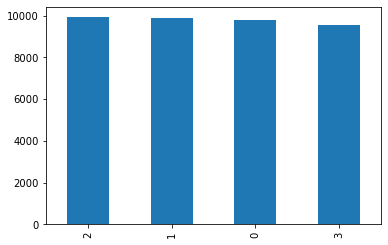

In [99]:
print('v2열의 유니크한 값 :',kr_data['tweet'].nunique())

kr_data.drop_duplicates(subset=['tweet'], inplace=True)

print('총 샘플의 수 :',len(kr_data))

kr_data['label'].value_counts().plot(kind='bar')

In [100]:
x_krdata = kr_data['tweet']
y_krdata = kr_data['label']

print('메일 본문의 개수: {}'.format(len(x_krdata)))
print('레이블의 개수: {}'.format(len(y_krdata)))

X_train, X_test, y_train, y_test = train_test_split(x_krdata, y_krdata, test_size=0.2, random_state=0, stratify=y_krdata)

메일 본문의 개수: 39127
레이블의 개수: 39127


In [101]:
word_count = dict()

for val in X_train:
    val = str(val)
    tokens = val.split()
    for i in range(len(tokens)):
        if tokens[i] in word_count.keys():
            word_count[tokens[i]] +=1
        else:
            word_count[tokens[i]] = 1

word_count = list(word_count.items())

word_count.sort(key=lambda x:x[1], reverse=True)

new_word_count = []

for i in range(len(word_count)):
    if word_count[i][1] > 4:
        new_word_count.append(word_count[i])
        

print(new_word_count[-1000:])

[('곧이어', 5), ('알티한', 5), ('사랑하자', 5), ('널위해', 5), ('아벨이', 5), ('것일까', 5), ('않다면', 5), ('무섭지', 5), ('기념으로', 5), ('몇개', 5), ('지지율이', 5), ('후에는', 5), ('치료를', 5), ('못가서', 5), ('부당한', 5), ('저까지', 5), ('싸우면', 5), ('정말요', 5), ('다잡고', 5), ('통하지', 5), ('반으로', 5), ('좋아하니까', 5), ('남들은', 5), ('생존', 5), ('놓친', 5), ('마당에', 5), ('받았으면', 5), ('쳐도', 5), ('작품에', 5), ('행복회로를', 5), ('듯한데', 5), ('뜬금없는', 5), ('터트렸다', 5), ('수현이', 5), ('가시가', 5), ('예뻤다', 5), ('도련님', 5), ('애인을', 5), ('내새끼', 5), ('남매', 5), ('엉망으로', 5), ('장난을', 5), ('개빡쳐서', 5), ('주먹으로', 5), ('보네', 5), ('지나서', 5), ('리더', 5), ('자연스러운', 5), ('너머', 5), ('화나', 5), ('연예인', 5), ('뭐래', 5), ('전엔', 5), ('작가님이', 5), ('빻은', 5), ('받아주는', 5), ('올려다', 5), ('이쯤', 5), ('국힘당', 5), ('정치를', 5), ('첫키스', 5), ('산즈', 5), ('퇴사', 5), ('묵고', 5), ('팬도', 5), ('배송지', 5), ('까지만', 5), ('시작할', 5), ('찢고', 5), ('고대', 5), ('분들의', 5), ('소주', 5), ('아녜요', 5), ('불같이', 5), ('이제니', 5), ('맘놓고', 5), ('울고싶은데', 5), ('이명박', 5), ('하냐고', 5), ('즉시', 5), ('짧고', 5), ('외로운', 5), ('조절을', 5), ('정도인데

In [102]:
word_dict = dict()

print(len(new_word_count))

for i in range(len(new_word_count)):
    word_dict[new_word_count[i][0]]= i+1

print(len(word_dict))

aa = list(word_dict.items())

print(aa[:50])

10310
10310
[('다', 1), ('너무', 2), ('진짜', 3), ('울', 4), ('그', 5), ('수', 6), ('슬픔', 7), ('것', 8), ('내가', 9), ('이', 10), ('안', 11), ('더', 12), ('거', 13), ('나', 14), ('내', 15), ('아', 16), ('근데', 17), ('잘', 18), ('그냥', 19), ('왜', 20), ('좀', 21), ('분노', 22), ('하고', 23), ('웃음', 24), ('저', 25), ('있는', 26), ('보고', 27), ('나는', 28), ('또', 29), ('한', 30), ('오늘', 31), ('하는', 32), ('정말', 33), ('난', 34), ('때', 35), ('아니', 36), ('울고', 37), ('게', 38), ('지금', 39), ('그런', 40), ('많이', 41), ('하', 42), ('이렇게', 43), ('우리', 44), ('할', 45), ('그리고', 46), ('행복', 47), ('못', 48), ('분노가', 49), ('넘', 50)]


In [103]:
X_train_enco = [[] for _ in range(len(X_train))]
y_train_en = [[] for _ in range(len(y_train))]
print(len(X_train_enco))
print(len(X_train))

31301
31301


In [104]:
print(X_train)

27062    힘 딸려서 그런가 거의 다 모아서 그런가진짜 얼마 안남았는데 짜잘한 부분때문에 안구...
1831     등을 두드려주면 옅게 웃음 소리를 내곤 저도 마주 등을 부드럽게 두드려주었다 고마워...
30242                                      아 근데 난 왼쪽이 넘 좋아
39817                                     손우현  배우 인스타스토리  
24531                                 재희 형이라고 하지 마 씹새끼라고 해
                               ...                        
6235     뉴진스 다들 어텐션  스춤뉴진스 조합 대박이다 한여름의 에어컨팥빙수얼음열개넣은아이스...
35597    로  하는 거 단점 내 모델은 각도가 달라지면 화면이 꺼져서 팔을 들고서 트위터를 ...
37646                        에 미쳤다 개빈 나 너 얼굴은 아직도 기억해울 뽀짝이
9207     억 얘기 듣고 보니까 둘 더 찾았어요 모기소리님 진짜 배우신 분 수현이 생일인데 많...
27769                       온 국민을 분노케 했던 수원 대 토막살인사건 오원춘  
Name: tweet, Length: 31301, dtype: object


In [105]:
mm = 0
for val,label in zip(X_train,y_train):
    val =str(val)
    tokens = val.split()
    for i in range(len(tokens)):
        if tokens[i] in word_dict.keys():
            X_train_enco[mm].append(word_dict[tokens[i]])
    y_train_en[mm].append(label)
    mm +=1

In [106]:
Last_X_train_enco = []
Last_y_train_enco = []
print(len(Last_X_train_enco))
print(len(Last_y_train_enco))

0
0


In [107]:
mm = 0
for val,label in zip(X_train_enco,y_train_en):
    if val !=[]:
        Last_X_train_enco.append(val)
        Last_y_train_enco.append(label)
        mm+=1

In [108]:
print(Last_X_train_enco[:8],Last_y_train_enco[:8])

[[1149, 1150, 258, 1, 2835, 842, 72, 431, 49, 68, 8360, 96, 2227], [2491, 3935, 24, 909, 119, 3321, 2491, 4289, 552, 411, 2836, 10, 1730, 1575, 219, 3322, 1314, 4290, 1863, 1314, 48, 4755, 2348, 910, 800, 75, 352, 3619, 718, 1576], [16, 17, 34, 50, 162], [8361, 1644, 6055], [8362, 227, 415, 107], [5312, 309, 4, 13, 310, 1151, 1, 11, 323, 1731, 137], [1732, 734, 3936, 222, 4291, 4, 76, 4756, 3620], [2837]] [[3], [1], [0], [0], [3], [1], [0], [3]]


In [74]:
for val,label in zip(X_train_enco,y_train_en):
    print(val,label)

[1149, 1150, 258, 1, 2835, 842, 72, 431, 49, 68, 8360, 96, 2227] [3]
[2491, 3935, 24, 909, 119, 3321, 2491, 4289, 552, 411, 2836, 10, 1730, 1575, 219, 3322, 1314, 4290, 1863, 1314, 48, 4755, 2348, 910, 800, 75, 352, 3619, 718, 1576] [1]
[16, 17, 34, 50, 162] [0]
[8361, 1644, 6055] [0]
[8362, 227, 415, 107] [3]
[5312, 309, 4, 13, 310, 1151, 1, 11, 323, 1731, 137] [1]
[1732, 734, 3936, 222, 4291, 4, 76, 4756, 3620] [0]
[] [0]
[2837] [3]
[2228, 7004, 2349, 5, 38, 7] [0]
[3323, 7005, 8363] [1]
[202, 7006, 6056, 92, 5313, 8364, 210, 72, 1645, 92, 3621, 279, 94, 5314, 45, 600, 1, 940, 3, 2] [2]
[2655, 490, 1419, 4757, 5315, 7007, 4758, 13, 52, 2838, 469, 1000, 324, 13, 514] [2]
[2, 9, 237, 23, 544, 545, 147, 35, 3, 369, 26, 13, 7008, 3324, 2656, 259, 3324, 7009, 71] [1]
[292] [3]
[159, 6057, 3937, 3, 1, 3622, 668, 612] [3]
[] [1]
[469, 6058, 2, 17, 104, 3938, 5316, 4759, 18, 3080, 6059, 3325, 843, 1864, 4760, 1865, 64] [0]
[] [0]
[14, 349] [0]
[39, 57, 8365, 1866, 8366, 654, 10, 386, 8367, 7

[] [0]
[3, 425, 2741, 89, 425, 76, 76, 242, 242, 425, 3, 103, 8450] [3]
[865, 1, 7339, 968, 169] [0]
[453, 337, 62, 275, 146, 2167, 275, 6144, 815, 1445, 440, 614, 3186, 2, 440, 71, 211, 342, 99, 1492, 189, 287, 91, 33, 485, 359] [1]
[64, 430, 170, 113, 25, 349, 434] [1]
[467, 795, 267, 900, 834, 81, 34, 1011, 493, 8465, 474, 29, 20, 4948, 4294, 3375, 692, 21, 1254, 106, 43, 444, 106] [2]
[] [0]
[35, 466, 3] [0]
[1995, 813, 2, 567, 57, 813, 2732, 3187, 1062, 1619] [1]
[15, 352, 40, 34, 4949, 93, 1018] [1]
[84, 3753, 1598, 40, 46, 90, 1, 6304, 1297] [0]
[5, 3188, 246, 660, 290, 1026, 742, 840, 607, 6, 910, 622, 28, 8769] [1]
[108, 958, 1240] [3]
[1407, 859, 7340, 6305, 2906, 87, 458, 349, 824, 13, 310, 78] [3]
[623, 2364, 42] [0]
[315] [2]
[143, 2407, 1892, 7341, 447, 724, 2664, 4950, 4054, 7313, 2946, 63, 8770, 67, 2298, 11] [2]
[] [1]
[106, 3189, 284, 3967, 65, 4474, 78, 2181, 1696, 8553, 2, 5526, 1507] [2]
[4] [0]
[2947, 2750, 8771, 245, 2354, 8772, 4348, 2494, 1055, 115, 1183] [0]
[

[22] [3]
[1381, 1494, 44, 157, 53, 344, 4, 94, 7547] [0]
[7231, 1036, 1793, 107, 52] [1]
[532, 133, 2210, 482, 10, 4524, 56, 907, 13, 5459, 1360, 48, 9055, 18, 4975, 7443, 34, 195, 2210, 132, 6493, 1376, 5381] [2]
[7548, 45, 1251, 7357, 131] [3]
[830, 39, 15, 2712, 1212, 9056, 672, 4003, 1793, 9, 233, 3515, 445, 2030, 1781] [1]
[16, 3, 37, 11, 37, 149, 612, 285, 3, 396, 18, 5382, 508, 9057, 551, 198, 3178] [2]
[1118, 162, 603, 1552, 6494, 785, 1782, 159, 2889, 879, 240, 1143] [1]
[] [3]
[15, 2617, 179, 6064, 1736, 208, 1166] [3]
[42, 1501, 7415, 10, 1382, 204, 81, 2945, 1256, 337, 9058, 8831, 2155, 7549, 1119, 17] [2]
[27, 3689, 1353, 3740, 27, 7550, 4143, 1433] [1]
[7551, 1947, 227, 45, 2449, 811, 2280, 2, 2681, 338, 2292, 5686, 1486, 26, 73, 445, 970, 375, 94, 2292] [2]
[] [1]
[1, 1081] [2]
[] [0]
[4148, 238, 6257] [3]
[2] [0]
[9059] [2]
[3, 41, 7552, 11, 8572, 202, 37, 1823, 3357, 2359, 11, 4149, 108] [2]
[1163, 45, 6, 163, 8, 169, 4566, 93, 8445, 5395, 1906, 9060] [1]
[42, 7, 22] [

[2106, 40, 385, 56, 164, 5609] [1]
[277, 3871, 1857, 18, 11, 9284, 259, 41, 1857, 18, 5802, 58, 9, 6616, 4015] [0]
[4620, 4640, 7067, 2305] [1]
[2, 867, 858, 54, 1809, 2593, 60, 476, 3999, 7718, 48] [3]
[36, 17, 3, 2, 1391, 265, 106, 11] [3]
[16, 3, 2, 43, 293, 3198] [2]
[8927, 5611, 59] [3]
[42, 10, 1523, 3400, 14, 3, 100, 10, 9285, 56, 1, 4391] [2]
[36, 228, 19, 938, 5803, 6, 26, 38, 2, 2, 7] [0]
[17, 14, 526, 1322, 702, 41, 1212, 86, 1358, 1106, 248, 66, 48] [2]
[195, 1, 114, 9286, 69, 146, 1262, 961, 1258, 3030] [1]
[2, 3872] [0]
[] [0]
[6142, 587] [0]
[3, 10, 710, 2, 7] [0]
[36] [2]
[927] [3]
[770, 792, 497, 606, 7, 2704, 372, 1980, 4621] [0]
[265, 31, 726, 850, 52, 5038, 26, 2803, 2818, 242, 5726, 15, 3873, 127, 736] [3]
[7746, 41, 198, 1314, 1621, 429, 12, 1171, 1411, 12, 41, 1344, 12, 1314, 290, 3322, 3137, 44, 198, 544] [2]
[10, 7, 19] [0]
[7747, 317, 774, 619, 13, 2, 2924, 2534, 610, 610, 218, 762, 424, 1319, 13, 2, 293, 13, 180, 1, 84, 883, 255, 7748, 449, 248, 45, 8, 1173] 

[31, 222, 1350, 9, 634, 687, 206, 1463, 4821, 208, 8, 3996, 501, 3246, 43] [3]
[] [1]
[27] [1]
[866, 1436, 6240, 1724] [0]
[776, 165, 119, 3212, 949, 7869] [1]
[] [3]
[60, 5878, 524, 72, 104, 507, 8] [3]
[2486, 21, 7] [0]
[1343, 5395] [2]
[] [0]
[669, 24] [1]
[65, 65, 376, 9471, 6, 144, 65, 1774, 20, 20, 5611, 9472, 7371, 6357, 9, 3058, 32, 2371, 527, 385, 261, 1264, 248, 126, 116, 177, 161] [3]
[2, 2, 7] [0]
[2145, 237, 40, 46, 21, 4671, 82, 2145, 439, 3572, 4828] [3]
[16, 54, 308, 2, 7] [1]
[1, 2215, 91, 7004] [0]
[] [0]
[5507, 7591, 633, 4991, 1816, 117, 1773, 23, 29, 3391, 2088, 1859, 4201, 501, 630, 5317, 360, 7525] [3]
[121, 795] [0]
[2420, 4654, 4232, 179, 554, 9223] [3]
[] [0]
[3149, 4642, 14, 182, 1400, 2065, 1303, 59] [3]
[24] [1]
[6728] [0]
[29, 115, 2277, 3278, 29, 2277, 207, 82, 29, 2277, 181, 272] [3]
[755, 1119, 60] [3]
[172, 1564, 1297, 124, 425, 2239, 1853] [0]
[1, 4541, 276, 2431] [0]
[77, 6108, 1874, 7624, 10, 332, 73, 2775, 628, 2334, 7452, 42, 173, 2506, 107, 968, 

[350, 113, 124] [2]
[454, 14] [2]
[] [2]
[563, 154, 969, 7591, 128, 159, 2466, 5044] [0]
[119, 7] [0]
[41, 7990, 1451, 1545] [0]
[632] [2]
[9413] [1]
[309, 2, 4361] [0]
[28, 7781, 2178, 408, 1907, 9449, 4827, 9, 2178, 1646, 7991, 1813, 337, 1368, 1813, 4048, 57, 592, 413, 227, 344, 271, 33, 80] [1]
[] [0]
[351, 888] [0]
[1, 141, 469, 974, 293, 99] [2]
[90, 39, 332, 3908, 39, 2671, 190] [0]
[4, 1900, 461, 2992, 19, 2716, 10, 7992] [0]
[1060, 6808, 1885, 294, 2108, 2807, 117, 505, 866, 156, 204, 3212, 15, 9550, 15, 249, 1411, 845, 4211, 1060, 6808, 1885, 233, 174, 283, 1083, 209, 15, 4795, 91, 1844, 5, 174, 4217, 15, 891, 15, 1129, 294, 1005, 5940, 352] [1]
[2, 3689, 7] [0]
[295, 212, 202, 951, 4882, 263, 29, 8, 400, 344, 4, 387, 5941, 1, 107, 1006, 45, 6, 163, 8, 109] [2]
[5247, 3] [3]
[1181, 1531, 1362, 1944, 125, 1001, 2229, 1002, 9453, 160, 366, 3218, 34, 1945, 1946] [0]
[] [2]
[36, 74, 3974, 928] [2]
[66] [2]
[248, 560, 845, 1848, 3067, 386, 7650, 211, 7819, 707, 67, 52, 1] [1]
[503

[1355, 214, 4197, 179, 3688, 214] [3]
[3009, 12, 3466, 584, 521, 2029, 23, 2, 165, 684, 12, 4714, 1885, 23, 3566, 40, 14, 27, 1149, 1460, 24, 1689, 15, 1261, 5, 69, 1172, 65, 19, 2053] [1]
[786, 225, 461, 26, 164, 3825, 5, 3825, 4854, 2380, 102, 25, 5450, 59, 5059, 162, 123, 649, 34, 65, 726, 78, 761, 6, 828, 1680, 8769] [3]
[3, 1670, 70, 43, 1] [0]
[1527, 4929, 1527, 9401, 106, 6063, 141, 24] [1]
[746, 155, 59, 5805, 3118, 2857, 1839, 173] [3]
[1509, 2827] [0]
[14, 3, 31, 100] [2]
[1485] [2]
[320, 6697, 1342, 2455, 143, 2757, 2917, 2113, 1270, 174, 268, 2442, 174, 4439, 3638, 15, 518] [2]
[] [2]
[43] [0]
[7254, 6498, 70, 2479, 1045, 296, 822, 28, 93, 1048, 318, 730, 134, 3722, 190, 189] [1]
[1055] [2]
[] [3]
[389] [3]
[44, 2261, 27, 176, 3, 787, 235, 5237, 3173, 7990, 1, 23, 63, 64, 227, 1426] [1]
[786, 703, 41, 135, 111, 142, 2964, 526, 329, 41, 17, 3937, 44, 43, 6, 4895, 44, 2377, 1099, 6, 203, 228, 124] [2]
[964, 2483, 4542, 812, 151, 70, 1956, 1648, 2145, 583] [2]
[5202, 2986, 945

[5250, 5250] [2]
[] [2]
[9227, 22] [3]
[1677, 3040, 99, 2040, 354, 2292] [2]
[8472, 2392, 33, 131, 5270, 123, 1, 9885, 1273, 1667, 4148, 640, 18] [3]
[3306, 1102, 136, 171, 591, 2416, 330, 40, 399, 2650, 158, 8157, 4242, 158, 3306, 2650, 616, 1442, 6099, 124] [2]
[852, 820, 19, 44, 269, 53, 9831, 4335, 1803, 71, 867, 6, 26, 549] [1]
[977, 1605, 5914, 1024] [3]
[1106, 217, 138, 447, 1532, 131, 3415, 196] [3]
[2484, 261, 1264, 248, 161, 126, 116, 177, 82, 181, 207, 272] [3]
[3834, 323, 1999, 862, 3557, 640, 358, 36, 84, 40, 4128, 5, 4209, 19, 1555, 64, 1410, 2057, 1188] [1]
[1769, 815, 478, 238, 1198, 2253, 23, 5552, 1198, 1465, 6, 705, 73, 296, 1306] [3]
[10, 4730, 353, 19, 3046] [1]
[133, 783, 535, 1938, 535, 38, 28, 95] [0]
[62, 17, 3928, 458, 3, 50] [2]
[182, 3800, 2971, 3506, 158, 611] [0]
[196, 849, 2320, 522, 2342] [3]
[251, 6898, 731, 2, 2126, 25, 685, 7934, 25, 15, 654, 30, 989, 12] [0]
[70, 4882, 1540, 197, 6, 1489, 89, 43, 185, 54, 8, 5123] [1]
[28, 758, 817, 112, 1107, 72, 43

[] [2]
[1552, 2187, 864, 36] [2]
[3060, 4729, 32, 73, 259, 4, 8, 156, 2681, 8878, 4233, 26, 5297, 1068, 1, 5085, 8, 156, 1, 37, 34, 4597, 2796, 6613, 1244] [2]
[123, 101, 264, 479, 370, 1580, 210, 40, 1902, 8577, 123, 2273, 1141, 53, 1884, 1468, 8109, 5682, 45, 691, 36, 309] [2]
[4124, 1085, 188, 653, 3733, 413, 1740, 60, 448, 440, 2580, 342, 2085, 3733, 8, 1616] [3]
[106, 3, 131, 44] [3]
[9754, 20, 974, 301, 2413, 22] [3]
[4559] [0]
[4419, 885, 11, 83, 1, 6920, 30, 549, 13, 109] [3]
[4, 80, 188, 1348, 392, 8, 142, 139] [0]
[5381, 4466, 2723, 9860, 6, 910, 146, 708, 327, 104, 104, 963, 698, 2559] [0]
[442, 1315, 1534, 336, 26, 8, 340] [1]
[2769, 1235, 5872] [1]
[6136, 236] [3]
[7717] [0]
[9965, 5882, 438, 74, 43, 146, 301, 484, 328, 5675, 4, 3260, 526, 50, 139, 133, 6261, 381] [2]
[66, 145, 40, 13, 1601, 1642, 416, 70] [2]
[9966, 243, 62, 44, 2247, 490, 329, 2, 2316, 359, 44, 2247, 113, 5941, 1, 23, 913, 3, 243, 9966] [1]
[6921, 2, 389] [3]
[6239, 4007, 6484] [0]
[55, 6398, 52, 45, 73,

[2724, 1, 257, 637, 278, 3, 264] [0]
[810, 66] [2]
[7444, 755, 420, 1, 8248, 9959, 285, 88, 102, 3196, 370, 4127, 14, 4256, 2112, 162, 17, 81, 1210] [2]
[1089] [0]
[489, 4567, 9, 106, 4831, 1161, 11, 262, 6644, 1715, 1346, 73, 262, 17, 546, 11, 612, 122, 1597, 8572, 11, 197, 536] [2]
[4684] [0]
[270, 888, 5, 1778, 1409, 1622, 1623, 299, 1624, 1625, 1626, 1627, 1697, 1698, 1699, 1700, 1628, 1701, 1629, 1630] [3]
[22, 3108] [3]
[5958, 17, 70, 19, 6452, 6760, 5698, 378, 96, 43, 9057, 21, 41, 16, 1347, 21, 21, 16, 2335] [2]
[16, 17, 14, 55, 1236, 7026, 15] [0]
[2575, 6872, 114, 378, 46, 1100, 9581, 2119, 505, 385, 8187, 276] [1]
[58, 372, 308, 924, 372, 1164, 2, 24, 372] [1]
[579, 3330, 404] [0]
[20, 60, 2977, 1463] [3]
[7686, 3, 3225, 17, 2976, 3, 648, 479, 445, 500, 3] [2]
[36, 7261] [1]
[70, 49] [3]
[2727, 601, 6871, 687, 1985] [0]
[1063, 3, 2, 91, 6] [1]
[10040, 1589, 323, 4589, 74, 843, 118, 843, 1, 353] [2]
[1, 951, 2166, 3276, 257, 112, 4737, 331, 430, 45, 273, 857, 1179, 35, 454, 7

[2099, 828, 3201, 1363, 40, 5692, 911, 146, 19, 10, 1207, 239, 9365, 5628, 6400, 402, 651, 2834, 874] [3]
[] [0]
[208, 164, 518, 269, 402, 413, 3503, 1652, 5549, 760, 1482, 26, 38, 648, 482, 2531, 554, 505, 56, 2453, 844, 145, 663, 8164, 190, 4701] [2]
[2996, 10042, 3120, 223, 371, 1796, 3583] [1]
[36, 59, 5338] [3]
[717, 461] [3]
[16, 1551, 319, 13, 3674, 25, 3, 4088, 8590, 97, 48, 7969, 8914, 3146, 17, 3, 353, 603, 264, 1, 2645, 13, 109, 17, 506, 2877] [1]
[2385, 35, 362, 2789, 2, 8366, 39, 526, 2, 839, 25, 430, 2, 558, 273] [2]
[3608, 29, 7883, 6842, 296, 986, 237, 513, 361, 8256, 171, 779, 242, 4, 3511, 451, 13, 142, 2149] [3]
[2669, 21, 21, 2669, 2, 21, 9274, 1546, 78, 3212, 5, 1866, 3662] [1]
[8456] [2]
[1819, 68, 103, 3431, 209, 40, 21, 175, 793, 711, 17, 7, 36, 2301] [0]
[34, 3603, 3148, 6, 232, 9, 916, 3031, 703, 562, 2931, 338, 3943, 1106] [3]
[157, 43] [0]
[1024, 1024, 2622, 5375, 5199, 3887, 4353, 104, 5026, 9882, 796, 4413, 3076, 1105, 7700, 2452, 5914, 3658, 1131, 12, 537

[164, 631] [3]
[152, 3654, 1066, 77, 4318, 125] [0]
[52, 697, 47] [1]
[31, 8636, 5732, 7139, 47] [1]
[1777, 319, 976] [2]
[10, 3154, 539, 891, 95, 1322, 88, 894, 6571, 2336, 5479, 62] [2]
[119, 5377, 813, 1620, 4, 33, 11, 307] [0]
[2583, 143, 7170, 6, 54, 112, 1663, 6284, 79, 1404, 2013, 30, 9238, 1979, 877, 814, 1668, 743, 466, 321, 210, 282, 40, 397, 304] [2]
[235, 1230, 5475, 3776, 758, 2993, 3509, 191, 4262, 1326, 1203, 25, 5584, 20] [3]
[16, 3251, 16, 22] [3]
[] [0]
[28, 1040, 5151, 2, 139, 5, 4286, 6346, 360, 414, 5, 8922, 4750, 2407, 32, 38, 162, 1501, 821, 79, 38, 145, 280, 538, 922, 69, 6887, 98, 117, 811, 1237, 107, 1405, 366, 233, 53] [1]
[] [0]
[89] [2]
[] [2]
[10, 97, 406, 151, 1043] [1]
[1077, 2649, 2, 7] [0]
[] [1]
[] [0]
[5520, 2, 2423, 417, 596] [2]
[555, 2615, 6643, 1808, 174, 428, 9669, 75, 24, 27, 176, 27, 1743] [1]
[3428, 18] [1]
[2729, 10144, 3250] [0]
[3, 128] [0]
[5660, 690, 4043, 104, 729, 5770, 71, 6947, 221, 1183, 3846, 831] [1]
[3671, 6602, 48, 284, 641, 215

[25] [0]
[3153, 4383, 5887, 1, 34, 1855, 1728, 793, 6451, 9, 21] [2]
[3, 5306, 10, 1895, 27, 60, 1339, 248, 3875, 2472] [3]
[456, 5, 6324, 477] [2]
[79, 851, 1, 4619, 2127, 38, 50, 14, 21, 417, 50, 367, 3958, 838, 51, 882, 1047, 3362, 8102, 1, 45, 3032, 13, 806, 153, 18, 407] [1]
[478, 122, 1654, 1846, 1267, 6035, 329, 2, 1406, 721, 5742, 2202] [1]
[4, 1104, 829, 31, 91, 3901, 952, 3055, 1499] [0]
[5376, 4, 422, 395] [2]
[2, 141, 71, 2608, 3277, 77, 433, 2, 5830, 75, 665, 29, 39, 10126, 188, 3] [1]
[2477, 3919, 3184, 7188, 12, 22, 3082, 10209] [3]
[13, 340] [2]
[1168] [1]
[964, 60, 1456, 33, 42] [3]
[220, 477, 1415] [3]
[1289, 523, 10167, 570, 607, 6, 2479] [0]
[] [0]
[6227, 629, 1221, 10, 5207, 480, 141, 666, 4698, 435, 6, 26, 5812, 951, 2696, 5863, 89, 197, 6, 163, 754, 558, 998, 779, 321, 3032, 73, 75, 2194, 225, 2258] [3]
[8471, 159, 1450] [2]
[59, 1589, 1536] [3]
[301, 1, 301, 1, 128] [0]
[7] [1]
[] [3]
[336, 9359, 21, 12] [1]
[4159, 23, 66, 1660, 579, 6556] [2]
[88, 72, 7] [0]
[7

[2674, 1319, 468, 373, 1480, 9108, 49] [3]
[9] [2]
[800, 34, 270, 4496, 15, 282, 1063, 246, 34, 33, 15, 6938, 127] [1]
[846, 3306, 86, 4530, 59, 991, 1214, 690] [3]
[2069, 24, 545, 4579] [1]
[2769] [0]
[] [3]
[188, 1547, 227, 743, 3405, 2644, 6860, 8618, 25, 442, 306, 3484, 258, 620, 4445, 187, 90, 88, 234, 2851] [2]
[4792, 1501, 179, 3078, 9697] [3]
[264, 1386, 2082, 26, 5458, 5718, 1526, 257, 1848, 1914, 9046, 2360] [0]
[2, 7, 2319, 121, 540, 4742, 2949, 11, 1434, 691] [0]
[5346, 2482, 896, 7802, 3, 21, 131] [3]
[835] [1]
[42] [1]
[718, 10235, 223, 1774, 4, 739, 2950, 6790, 979, 45, 112, 347, 435, 64, 183, 4799, 2743, 121, 6789, 41, 8487, 51, 273, 494, 979, 3785] [2]
[] [1]
[14, 14, 1559, 636, 306, 59, 72, 714, 48, 92, 128, 30, 3141, 6756, 1763, 2961, 220, 3013] [3]
[75, 114, 794, 706, 4870, 3595, 5872, 353, 52, 287] [1]
[5591, 4, 226] [2]
[770, 792, 497, 606, 7, 7613, 4621, 320, 267] [0]
[8152, 1764, 6301, 232, 1764, 880, 3549, 7215, 225, 2963, 2790, 3242, 3503, 4671] [3]
[3150, 4, 

[20, 8716, 1310, 692, 20, 6, 2146, 1310, 692, 5, 98, 1879, 1350, 346, 3074, 2703, 695, 32, 2040, 4746, 814, 747, 6, 1574, 3944, 6601] [1]
[74, 327, 787, 326, 29, 7397, 57, 4162, 4261] [2]
[1253, 5785, 5075] [0]
[1333, 337, 2, 610, 7, 15, 801, 3283] [0]
[16, 4, 1273, 32, 7922, 215, 9, 1] [0]
[54, 302, 2186, 582, 2, 839, 3715, 7] [0]
[19, 9, 27, 1336, 7896, 1224, 5, 33, 5803, 81, 231, 10267, 330, 1586, 2591, 9111] [2]
[7] [0]
[55, 5974, 3069, 127] [3]
[2614, 373, 2905, 19, 322, 241, 13, 404, 64, 86, 48, 5427, 99, 1, 8622] [2]
[20, 67, 1549, 557] [0]
[8245, 4040] [0]
[25, 4, 3] [2]
[323, 2, 7] [0]
[7, 1968] [0]
[] [0]
[6863, 8890, 41, 1798, 35, 32, 8654, 2314, 6343, 45, 6, 571, 291] [1]
[1422, 2, 729, 43, 2, 162, 719, 24, 3383, 542] [1]
[215, 333, 2586, 598, 458, 176, 167, 1735, 145, 29, 7572, 7000, 677, 141, 115, 221] [2]
[3802, 238, 1051, 5400] [3]
[67, 1862, 2541, 598, 887, 69, 157, 963, 63, 5099, 6, 212, 189, 642, 6787, 2638, 1097, 10178, 23, 608, 659, 64, 8096] [1]
[44, 174, 89, 1035

[5199, 4, 387] [2]
[126, 116, 82, 181] [3]
[3645, 4, 6, 443, 735, 74, 57, 1269, 5, 4530, 4018, 370, 592, 73, 4147, 471, 482, 210, 180] [2]
[3319, 121, 4522, 547, 24] [1]
[1203, 212, 505, 6, 175, 80, 8, 156, 7017, 155, 38, 120, 781, 263, 351, 3909, 714, 5164, 6935, 211, 1578, 584, 992, 604, 719, 1185, 1004, 1141, 117, 1597, 5, 9662, 9761] [1]
[] [2]
[36, 10, 66, 793, 9979] [2]
[1431] [3]
[2159, 22] [3]
[343, 16, 62, 16, 378] [2]
[211, 337, 31, 201, 5302, 3900, 787, 2, 1718, 949, 44, 114, 3212] [1]
[68, 335, 106, 1] [1]
[934, 68, 603, 4883, 62] [1]
[1298, 829, 2907, 1155, 238, 3842, 9824] [3]
[265, 1236, 979, 24, 194] [1]
[83, 147, 255, 4937, 1645, 2, 3465, 1670, 2288, 2725] [1]
[1373, 8933, 4033, 937, 93, 8625, 3548, 894, 724, 2372, 547] [1]
[42, 2731, 6589, 508, 1567, 677, 373, 94, 667, 52, 4, 286, 1189, 388, 494, 804] [2]
[664, 664, 2637, 125, 1606, 5750, 1175, 115, 7972, 3582, 722, 8606, 2130, 1224, 71, 1934, 151, 1654, 125] [1]
[2496, 6574, 5062, 49, 6241, 1265, 406] [3]
[2572, 2, 1

[22, 162, 1, 3237] [3]
[3, 186, 24, 62] [1]
[131, 3] [3]
[2583] [1]
[496, 302, 486, 60, 5104, 117, 311] [3]
[213, 5751, 5289, 219, 7780, 6728, 7812, 7988, 860, 498, 2264] [2]
[179, 414] [3]
[2024, 17, 29, 2708, 90, 50, 9936] [1]
[2055] [0]
[4193, 1652, 93, 2593, 1441, 253, 4193] [1]
[242, 38, 130, 2089, 12, 2613, 242, 3, 6244, 3, 3] [3]
[47] [1]
[701] [3]
[3, 2, 15, 1408, 8736, 35, 9, 2358, 629, 2, 638, 2590, 83, 11, 88, 18] [1]
[196] [3]
[16] [0]
[3467] [0]
[31, 2, 139, 2, 335, 940, 2051] [2]
[2466, 346, 1] [0]
[34] [2]
[3193] [1]
[1365, 14, 579] [1]
[9231] [2]
[17, 3607, 81, 5158, 13, 1065, 1551, 35, 81] [0]
[9, 737, 1, 49, 146, 38, 21, 839, 7647] [3]
[3079, 10110, 7772, 216, 262, 3, 7146, 62] [1]
[14, 95, 390, 31, 4839, 2028, 140, 206, 339, 12, 1752, 682, 115, 1291, 2510, 1442, 3442, 8914, 9585] [1]
[6811, 425, 42, 17, 3258, 57] [0]
[1764, 4033, 2218, 914, 1022, 5, 2997, 796, 2109, 56, 5125, 2223, 23, 30, 7994, 69, 6949, 737, 10178, 356, 204, 9986, 10, 356] [1]
[4, 133, 760] [0]
[22

[36, 2, 7, 191] [3]
[10145, 68, 24, 1689, 136, 7001, 68] [1]
[65, 1886, 147, 6, 230, 3, 7] [2]
[261, 233, 71, 2533, 9, 294, 651, 38, 233, 1412, 148, 8702, 4851, 1178, 453, 716] [1]
[51, 418, 37, 5301, 350, 150] [2]
[4, 709, 50, 4370, 2968] [2]
[] [0]
[] [0]
[8983, 2079, 22, 361] [0]
[5045, 7239, 5468, 284, 2, 9400, 689, 1650, 4408, 101, 2] [2]
[31, 1467, 10138, 718, 1648, 981, 165, 33, 58, 1138, 735, 97, 1253, 745, 193] [1]
[477, 905, 130, 1346, 3286, 2508, 569, 5, 449, 54, 8187] [2]
[] [0]
[] [0]
[3282, 3976, 1257, 7074, 431, 3993, 1217, 3284, 493, 276, 626] [3]
[4337, 2321, 1, 458, 96, 532, 17, 20, 594, 1875, 87] [1]
[529, 676, 418, 52, 3995, 676, 418] [2]
[10238, 555, 10238, 5664] [3]
[44, 130] [3]
[2946, 138, 5, 1116, 3028, 1331, 1788, 454, 894, 1618, 1403, 2775, 6367, 217, 187, 7519, 291, 4210, 6207] [0]
[392, 2378, 27, 669, 22] [3]
[4503, 4696, 679, 2667, 4503, 4982, 4982, 643, 938, 4510] [2]
[39, 1432, 1538, 1751, 9353, 49, 8555, 1959] [3]
[16] [2]
[289, 1090, 83, 188, 7667, 364

[1883, 508, 1640, 2847, 1284, 2460, 772, 12, 4283, 14, 106, 13, 98, 1820, 1, 317, 472, 984, 1532] [2]
[] [3]
[2288, 6283, 3, 196] [3]
[36, 285, 531, 5996] [1]
[20, 1249, 84, 21, 1551, 2697, 66, 41, 11, 7108] [2]
[1490, 266, 196] [3]
[847, 63, 6875, 3105] [0]
[2327, 1497, 43, 293, 6] [2]
[1666, 70, 984, 1221, 1889, 159, 94, 1889, 464, 464, 3338, 67, 172, 1, 6007] [1]
[2407, 2935, 6841, 2087, 1685, 15, 956, 3356, 1066, 247, 945, 6841, 1167, 374, 15, 673, 9998, 91, 2439] [2]
[2, 7753, 68, 586, 1018, 358] [1]
[] [3]
[479, 199, 82, 534, 6113, 5787, 3059, 3282, 57, 45, 13, 21, 7, 884, 173, 99, 212, 2061, 13, 1173] [3]
[369, 5503, 548, 39, 5837, 5765, 344, 34, 860, 250, 942, 664] [2]
[] [3]
[93, 5252, 301, 29, 93, 301, 4220, 456, 649] [1]
[39, 69, 615] [1]
[753, 4, 3058, 120, 4274, 4789, 4131] [0]
[128, 3] [0]
[835] [1]
[9, 1258, 9394, 9821, 2736, 8325, 1334, 149, 7502, 245] [2]
[2356, 1230, 2248, 3572, 5135, 265, 10, 927] [3]
[5936, 40, 13, 4, 188, 3654, 392, 91, 10251, 9917, 94, 7458, 9, 16

[12, 1043, 8960] [0]
[9277, 3811, 573, 10277, 1215, 3946, 1346, 1820] [0]
[130] [0]
[] [1]
[6380, 7721, 5513, 642, 9134, 10238, 6398, 7659, 142, 4601, 11, 1361, 42, 11, 974, 1405, 149, 4451, 313, 6398, 1, 9058, 135, 27, 7605, 8730, 164, 348, 11, 986] [2]
[74, 28, 101, 5354, 63, 957, 8363, 1511, 542, 104, 5934, 5, 864, 6636, 101, 869, 28, 7804, 6, 530, 129, 3295, 9, 294, 10219, 6156, 15, 249, 63, 1412, 902, 232] [1]
[91, 3048, 4889, 3608, 65, 409, 88, 9, 4736, 5457, 117, 2583, 471, 15, 2473, 935, 276, 269, 283, 1267, 283] [3]
[1231, 24, 123, 34, 4511, 18, 801, 5395, 940, 8218, 23, 1424, 44, 3427, 5999] [1]
[1003, 4] [0]
[14, 2597, 3, 3775, 316, 6223, 7020, 99, 175, 176, 80, 125, 4749, 5265, 103, 7405, 160, 214] [0]
[247] [2]
[1896, 86, 1, 184, 4724, 995, 113, 1695, 1, 4299, 2113, 491, 1029, 2232, 64, 8958, 4402] [2]
[5343, 18, 432, 1301, 2223, 24, 70, 614, 81, 183, 1462, 70, 509, 10243, 56, 51, 1266, 376, 8469, 57, 1525, 2141, 6534, 796, 18, 5368, 830, 48, 5368, 4411, 53, 87, 1251, 915]

[3, 89, 470, 53, 8049, 88, 2432, 65, 3, 208, 470, 1150, 12] [2]
[] [2]
[24, 1026, 33, 9758] [1]
[] [1]
[72, 54, 714, 2289, 6, 250, 349, 11, 2658, 960, 354, 45, 8, 310, 128] [2]
[42, 244, 354, 21, 487, 3553, 202, 9892, 7] [2]
[2935, 739, 1845, 165] [2]
[77, 1305, 501, 5672, 38, 9, 213, 1593, 190, 373, 120, 1593, 38, 16, 120, 137, 1360, 7833, 2566] [3]
[] [1]
[692, 18, 2607, 416, 12, 1043, 8, 1794, 244, 69, 321, 8, 142, 2885, 393] [1]
[1605, 2663, 4933, 216, 128] [1]
[36, 194, 1265, 301, 20, 1, 3265, 4, 702, 2610, 2, 125, 1122] [2]
[768, 1105, 2465, 662, 25, 27, 862, 4599, 5754, 8, 53, 3, 50, 3213, 4415, 231, 1567, 662, 91, 4422, 6, 175, 12, 47, 5985, 18, 988] [1]
[6708, 3784, 7] [0]
[1925, 220, 3297, 110, 1833, 485, 589] [1]
[105, 6238, 120, 23, 24] [1]
[611] [0]
[656, 4443, 432, 559, 6167, 3370, 37, 1424] [2]
[83, 3, 7, 854, 8714, 5679, 5632, 7637, 2414, 215, 6551] [1]
[517, 311, 9, 2725, 102, 49] [3]
[24, 454, 1035, 8444, 314, 4811, 63, 283, 424, 963, 405, 9293, 625, 283, 937, 3921, 3

[67, 6505, 868, 5023, 42, 1786, 3, 2, 1313, 4, 709, 8170, 531, 276, 74] [2]
[5595] [3]
[926, 2859, 10143, 3665, 1432, 224, 60, 6994, 6128, 1817, 7741] [3]
[] [0]
[183, 696, 32, 148, 763, 3000, 5273, 40, 73, 67, 2712, 475, 498, 13, 4736, 866, 685, 327, 326, 297, 2333, 3064, 153, 6807, 416, 1330, 844] [2]
[171, 7872, 1334, 11, 335, 48, 4276, 33, 62] [2]
[36, 427, 404, 552, 684, 1367, 321, 870, 1112, 8875, 1881, 2112, 10017, 4669, 8305, 1533, 2161, 418] [2]
[610, 174, 1034] [0]
[2763, 1688, 10002, 839, 2279, 27, 503, 1161, 521, 521, 394, 269, 251, 7614, 6997, 7356] [2]
[] [1]
[213, 1165, 4455, 532, 9559] [3]
[286, 4, 9, 76] [0]
[48, 23, 43, 807, 728, 5, 1533, 1354, 95, 754, 1386, 501, 615, 1974, 1119, 106, 1, 206, 368, 5070, 4900, 428, 447, 30, 1748, 48, 30, 1974, 1119] [3]
[2811, 7766, 2811, 545, 2811, 7119, 1289] [1]
[7920, 1450, 2794, 1450] [2]
[2927, 1402, 160, 2348, 2144, 45, 3094] [0]
[667, 3, 10108, 1468, 82, 2364] [3]
[1280, 188, 491, 10096, 146, 1354, 418, 2232, 34, 406, 1094, 11

[2940, 7509] [0]
[] [3]
[5821, 599, 787, 358, 4199, 3716, 3430, 1731, 4199, 4565] [3]
[274, 10, 556, 510, 18, 11, 78, 108, 7487, 168, 7488, 6133, 6, 358, 337, 80, 6525, 3820, 18, 826, 3088, 11, 2867, 533] [2]
[16] [1]
[77, 22, 2866] [3]
[] [3]
[8991, 5483, 49, 6194, 1042, 138, 1042] [3]
[1194, 4860] [0]
[20, 64, 348, 40, 28, 632, 18, 273, 2907, 3587, 1223, 1424] [2]
[40, 89, 160, 44, 719, 9, 11, 2375, 5902, 754, 3346, 9, 43, 292, 727, 44, 1916, 136, 10152, 9, 11, 8921, 23, 3649, 130] [2]
[8547, 222] [3]
[1774, 10255, 349, 18, 1361, 387, 16, 470, 808, 538, 1361, 16, 470] [2]
[2023, 7176, 27] [0]
[306, 19, 53, 17, 59, 9121, 3148, 7875, 3082] [3]
[7451, 119, 141, 535, 3302, 282, 526, 21, 915, 9438, 119, 2961, 3805, 1442, 2275, 47] [1]
[866, 66] [2]
[97, 8, 8268, 652, 2695, 38, 1878, 3147, 16, 86, 749, 2867, 1458, 8122, 53, 13, 6195, 297, 808, 3523, 1890] [0]
[5, 124, 4581, 120, 1504, 124, 83, 479, 260, 17, 8246, 2220, 1, 9907, 104, 5026, 1504, 124] [3]
[341, 432, 7] [2]
[5595, 3714, 1452,

[14, 437, 89, 1011, 448, 311, 103] [0]
[566, 501, 575, 46, 931, 275, 8569] [3]
[43] [0]
[8332, 54, 774, 463, 2694, 5413, 759, 2694] [1]
[1813, 53, 365, 1556, 153, 80, 7643, 853, 63, 3615, 303, 285, 1157, 9023, 240, 592, 129, 105, 8559, 64, 7099, 37, 5632, 1235, 31, 717, 9891, 10299] [2]
[3233, 5550, 49, 5, 1296, 2552, 40, 6989, 45, 6, 341, 828, 3640, 3233, 108, 146, 6876, 360] [3]
[603, 14, 39, 24, 936, 144] [1]
[92] [1]
[8045, 8743, 35, 5875, 7652, 209, 6093, 24, 103, 474, 20, 838, 20, 106, 209, 3593, 843, 872, 214, 3, 9596, 2760, 673] [1]
[1041, 47] [2]
[21, 700, 779, 4089, 58, 2840, 4698, 4, 5, 800, 4089, 4089, 4, 94, 1454, 1363, 624, 1137, 2307, 2170] [0]
[193, 3292] [0]
[5756, 4, 387] [2]
[2466, 1, 52, 930] [2]
[611, 259] [0]
[2597, 3865, 5691, 10129, 44, 36, 180, 1, 8164, 3072, 12] [3]
[46, 33, 10, 2640, 20, 15, 2617, 15, 692, 8831, 2, 3103, 728, 71, 1934, 151, 3048, 1, 5194, 745, 4001, 692] [1]
[2873, 185, 25, 758] [3]
[] [0]
[] [0]
[450, 1377, 583, 47] [1]
[30, 1748, 2998, 624,

[255, 545, 255, 1094, 7187] [1]
[7740, 31, 2203, 753, 933, 122, 25, 115, 388, 159, 4203, 1123, 5310, 7458] [3]
[128, 3467] [3]
[220, 5, 1709, 206, 26, 13, 9062, 157, 11, 121, 1, 2294, 402, 5144, 2768, 157, 4204, 270, 5, 1080, 4327, 49, 1444] [3]
[5247, 10, 23, 4088] [3]
[269, 9492, 180, 2168, 2, 839] [1]
[454, 826, 132, 3216, 5868, 3698, 6, 26, 4819, 73, 3359, 108, 67, 1117, 30, 308, 8438, 5, 5, 4105, 1869, 112, 767] [1]
[770, 792, 497, 606, 7, 1052, 993, 1027, 282, 5539, 3759, 46, 5540] [2]
[41, 118, 21, 18, 3273, 325, 1, 473, 57, 1936, 9701, 9850, 692, 4910, 9486, 3232, 5190, 321, 256, 400, 2462, 243] [2]
[2326] [2]
[9944, 158, 723, 1334, 29, 37, 2796, 90, 201, 7993, 125, 380, 146, 10288, 96, 5, 2643, 176, 1516, 1576, 3749] [2]
[] [0]
[4687, 68, 485, 357] [1]
[5, 553, 261, 534, 3839] [3]
[557, 25, 351, 4255, 351, 373, 439, 237, 10301, 51, 433, 241, 42, 8356, 10, 266, 115, 2606, 62, 367, 19, 8356, 150, 6365, 2442, 253] [0]
[326, 2120, 4648, 1251, 2, 52, 817] [1]
[2641, 2088, 1241, 54,

[2925, 3755, 8404, 2100, 1840, 7176, 665, 8404] [0]
[6416, 115, 1977, 978, 25, 920, 2130, 6590, 6416, 4107, 1, 37, 55, 3400, 3924, 150, 231, 1375, 3153, 1297, 3643, 157, 7445, 6416, 76] [2]
[3, 87, 7] [0]
[3449] [3]
[194, 3, 3041, 3251, 9262] [0]
[6470, 962, 98, 9277, 8315, 406, 972, 2503, 5017, 4754, 4967, 197, 3094, 4480] [0]
[2, 2] [1]
[926, 7722, 371] [1]
[919, 1663, 7568, 33, 4, 159, 2, 2831] [2]
[4, 12, 148, 12, 4219, 1823, 3597, 8926, 4077, 27, 157, 900, 6178] [2]
[6984, 7, 829] [0]
[6855, 3125, 60] [3]
[17, 9714, 2, 335, 21, 7, 25, 75] [0]
[4, 278, 148, 5044] [0]
[96, 170, 47, 228, 47, 46, 52, 7158, 779, 777] [1]
[90, 59] [3]
[63, 3499, 6101, 3890, 97, 1645, 502, 6096, 8012, 22, 48, 936, 645, 2684, 1937] [0]
[] [0]
[470, 19, 99] [2]
[800, 5, 881, 1034, 5317, 824, 35, 9801, 8832, 1045, 1061, 1192, 9, 20, 2321, 21, 12, 7412, 90, 582, 88, 679, 102, 858] [3]
[] [2]
[30, 2049, 7874, 3379, 82, 1549, 609] [3]
[8990, 320, 71] [1]
[4924, 9548] [0]
[214] [0]
[14, 29, 85, 3, 100] [2]
[852

In [79]:
print(len(Last_X_train_enco))
print(len(Last_y_train_enco))

28596
28596


In [80]:
print(Last_X_train_enco[:5])
print(Last_y_train_enco[:5])

[[1149, 1150, 258, 1, 2835, 842, 72, 431, 49, 68, 8360, 96, 2227], [2491, 3935, 24, 909, 119, 3321, 2491, 4289, 552, 411, 2836, 10, 1730, 1575, 219, 3322, 1314, 4290, 1863, 1314, 48, 4755, 2348, 910, 800, 75, 352, 3619, 718, 1576], [16, 17, 34, 50, 162], [8361, 1644, 6055], [8362, 227, 415, 107]]
[[3], [1], [0], [0], [3]]


In [44]:
print(X_train_enco[:5])

[[1149, 1150, 258, 1, 2835, 842, 72, 431, 49, 68, 8360, 96, 2227], [2491, 3935, 24, 909, 119, 3321, 2491, 4289, 552, 411, 2836, 10, 1730, 1575, 219, 3322, 1314, 4290, 1863, 1314, 48, 4755, 2348, 910, 800, 75, 352, 3619, 718, 1576], [16, 17, 34, 50, 162], [8361, 1644, 6055], [8362, 227, 415, 107]]


메일의 최대 길이 : 51
메일의 평균 길이 : 9.028256


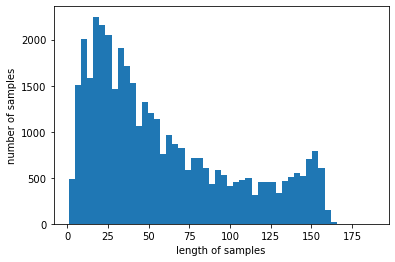

In [109]:
print('메일의 최대 길이 : %d' % max(len(sample) for sample in Last_X_train_enco))
print('메일의 평균 길이 : %f' % (sum(map(len, Last_X_train_enco))/len(Last_X_train_enco)))
plt.hist([len(sample) for sample in x_krdata], bins=50)
plt.xlabel('length of samples')
plt.ylabel('number of samples')
plt.show()

In [110]:
from keras_preprocessing.sequence import pad_sequences
max_len = 51
X_train_padded = pad_sequences(Last_X_train_enco, maxlen=max_len)
print("훈련 데이터의 크기(shape):", X_train_padded.shape)

훈련 데이터의 크기(shape): (28596, 51)


In [111]:
y_train.info()

<class 'pandas.core.series.Series'>
Int64Index: 31301 entries, 27062 to 27769
Series name: label
Non-Null Count  Dtype
--------------  -----
31301 non-null  int64
dtypes: int64(1)
memory usage: 489.1 KB


In [112]:
y_train_en_en = pd.DataFrame(Last_y_train_enco)

In [113]:
from tensorflow.keras.layers import SimpleRNN, Embedding, Dense
from tensorflow.keras.models import Sequential
from keras import optimizers
import tensorflow as tf

embedding_dim = 50
hidden_units = 64
vocab_size = len(word_dict) +1

model = Sequential()
model.add(Embedding(vocab_size, embedding_dim))
model.add(SimpleRNN(hidden_units,dropout=0.5))
model.add(Dense(4, activation='sigmoid'))

lradam = tf.keras.optimizers.Adam(lr=0.0002, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.001, amsgrad=False)

model.compile(optimizer=lradam, loss='sparse_categorical_crossentropy', metrics=['acc'])
history = model.fit(X_train_padded, y_train_en_en, epochs=50, batch_size=512, validation_split=0.2)

Epoch 1/50


C:\Users\comet\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


45/45 [==============================] - 3s 42ms/step - loss: 1.3843 - acc: 0.2773 - val_loss: 1.3565 - val_acc: 0.3285
Epoch 2/50
45/45 [==============================] - 2s 38ms/step - loss: 1.3451 - acc: 0.3351 - val_loss: 1.3318 - val_acc: 0.3565
Epoch 3/50
45/45 [==============================] - 2s 39ms/step - loss: 1.3215 - acc: 0.3705 - val_loss: 1.3204 - val_acc: 0.3804
Epoch 4/50
45/45 [==============================] - 2s 38ms/step - loss: 1.2995 - acc: 0.4091 - val_loss: 1.2998 - val_acc: 0.4229
Epoch 5/50
45/45 [==============================] - 2s 38ms/step - loss: 1.2699 - acc: 0.4478 - val_loss: 1.2659 - val_acc: 0.4696
Epoch 6/50
45/45 [==============================] - 2s 38ms/step - loss: 1.2147 - acc: 0.5029 - val_loss: 1.2053 - val_acc: 0.5145
Epoch 7/50
45/45 [==============================] - 2s 39ms/step - loss: 1.1444 - acc: 0.5421 - val_loss: 1.1392 - val_acc: 0.5587
Epoch 8/50
45/45 [==============================] - 2s 36ms/step - loss: 1.0682 - acc: 0.5802 

In [91]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, None, 50)          515550    
                                                                 
 simple_rnn (SimpleRNN)      (None, 64)                7360      
                                                                 
 dense (Dense)               (None, 4)                 260       
                                                                 
Total params: 523,170
Trainable params: 523,170
Non-trainable params: 0
_________________________________________________________________


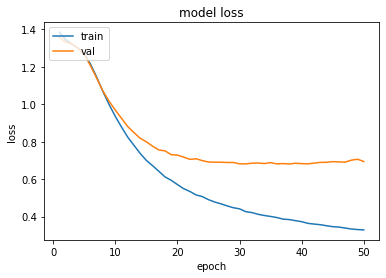

In [114]:
epochs = range(1, len(history.history['acc']) + 1)
plt.plot(epochs, history.history['loss'])
plt.plot(epochs, history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

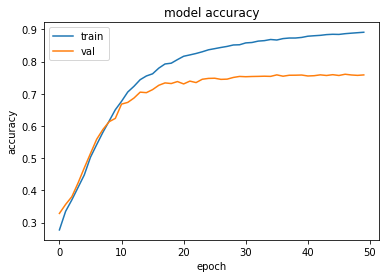

In [115]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')

In [150]:
X_test_enco = [[] for _ in range(len(X_test))]
y_test_en = [[] for _ in range(len(y_test))]
print(len(X_test_enco))
print(len(y_test_en))

7826
7826


In [151]:
kk = 0
for val,label in zip(X_test,y_test):
    val =str(val)
    tokens = val.split()
    for i in range(len(tokens)):
        if tokens[i] in word_dict.keys():
            X_test_enco[kk].append(word_dict[tokens[i]])
    y_test_en[kk].append(label)
    kk +=1

In [152]:
Last_X_test_enco = []
Last_y_test_enco = []
print(len(Last_X_test_enco))
print(len(Last_y_test_enco))

0
0


In [153]:
mm = 0
for val,label in zip(X_test_enco,y_test_en):
    if val !=[]:
        Last_X_test_enco.append(val)
        Last_y_test_enco.append(label)
        mm+=1

In [154]:
print(Last_X_test_enco[:5], Last_y_test_enco[:5])

[[59, 991], [36, 4401, 1472, 14, 2, 7], [622, 585, 199, 3006, 5028, 540, 108, 28, 635, 2233, 826, 5391, 1359, 563, 163, 35, 826, 227], [189, 4963, 2062, 799, 5, 1686, 198, 5, 7, 114, 1358, 5001, 204, 123, 277, 689, 610, 2437, 514, 417, 585, 795], [72, 69]] [[3], [0], [1], [2], [1]]


In [155]:
y_test_en_en = pd.DataFrame(Last_y_test_enco)

In [156]:
X_test_padded = pad_sequences(Last_X_test_enco, maxlen = max_len)
print("\n 테스트 정확도: %.4f" % (model.evaluate(X_test_padded, y_test_en_en)[1]))

224/224 [==============================] - 1s 2ms/step - loss: 0.7217 - acc: 0.7509

 테스트 정확도: 0.7509


In [352]:
for i, name in enumerate(X_train):
...     print(i, name)

0 힘 딸려서 그런가 거의 다 모아서 그런가진짜 얼마 안남았는데 짜잘한 부분때문에 안구해지는거 보면 매우 분노가 올라오면서 걍 비싸게 살까 그럼 몸은 편한같으면서 용납이 안되서 도돌이표임
1 등을 두드려주면 옅게 웃음 소리를 내곤 저도 마주 등을 부드럽게 두드려주었다 고마워 남은 하루는 이 노래를 들으면서 마무리해야겠다 오늘은 달이 예쁘게 떠 있었어 카메라가 밤하늘을 예쁘게 못 담아서 사진은 없지만 아무튼 그래서 널 생각했어 오랜만에 실기실을 갔는데 무궁화도
2 아 근데 난 왼쪽이 넘 좋아
3 손우현  배우 인스타스토리  
4 재희 형이라고 하지 마 씹새끼라고 해
5 이호준 웃는데 곧 울 거 같음 시즌 다 안 끝났는데 벌써 만원 털리는 타격코치가 있다
6 띠발 와중에 그놈의 본 간다고 울 강아디만 계속 왔다갔다 한거 렬받아
7 굿보이곤배드 어떠신지요
8 풀소유혜민스님 생각난다
9 유타는 주술고전 들어가면서 살아갈 자신감을 얻게 됐는데 유지는 그 반대인 게 슬픔  
10 양평군  용문면행복 나눔 냉장고에 나눔의 손길 이어져   보도뉴스   
11 ㅋㅋㅋㅋ그니깐요 진짜성의도 재기하고 맨날 똑같은거 양산형으로 내서 돈만 끌어모으려고하고 ㅋㅋ 아티스트 관리를 하는건지 마는건지 의심스러울 정도로 요근래 대처들 보면 한숨만 나오고 ㅋㅋ 컴백을 년에 한번 하면 지들 할 일은 다 했다인거 마냥 플랜 그지같이 짜는거 진짜 너무 열받아요
12 알겠어 울지마 너네 주인 숙맥이라 침대에서 옷만 벗고 누워있을 거 같이 생겼다 남자 새끼가 우는 거 아니야 주니어
13 후지미네 유키코 너무 내가 좋아할만한 타입이잖아 연기력 빠방하고 약간 맹해보이기도 하고 짱 귀엽고 볼 부풀릴 때 진짜 살 아들래미가 있는 거 맞냐고 생각된다고 쿠도 유사쿠 싸움 잘해 물론 싸움 못해도 유키코씨가 행복하니 부부의 행복을 빌겠습니다
14 남동충이 애인한테 찝쩍거리자 분노하는 나기사의 모습이다  
15 노동요로 오늘도 온앤오프 플레이리스트를 돌린다 온뿌 아니었으면 진짜 지난주에 다 폭파시키고 죽었을듯 천년의 분

995 헉 해연만 파다 오셧음 진짜 새로울 것 같아요 저두 밴드 처음이라 모든 게 다 새롭네요 공연 많은 게 특히 저랑 같이 밴드 열심히 조아해봐요
996 아니 이씹새끼들이 일러는 잘 뽑아놓고 모델링을  씨바 아이고 아이고 아이고 이놈들이 앞머리로 한쪽눈가린 남캐를 무시하네 억울해서 못살아  
997 나는 이렇게 힘든데 너는 웃음이 나 같은 생각이 든거야 그래서 나 더이상의 연애는 힘들겠구나 싶었어 애써 태연한척 옷을 건네고 조금만 더 있다 가라는 창민이를 거절하고 집에와소 현준이는 펑펑 울면서 자기 짐을 싸 짐이래야 옷만 쌀뿐인데고 한참이 걸렸어 가슴이 너무 아파 우느라고
998 애도 낳았어요
999 서번트는빙수일억개먹어도탈안난다네뭔 ㅠㅠㅠㅠ ㅠ 궁금 울 프시케는 빙수파일까요아이스크림파일까요 뭔가이러니까 결혼한친구랑 여름여행간거같네요이게뭔소리임 물장난은 여름의 낭만이니깐요끄덕끄덕 저 그 뭐지 손에 들고 하는 불꽃놀이도 보고싶다네요
1000 갈아입도록 하겠습니다 백사의 정복을 더럽히게 되다니 제 실수입니다
1001 이 분노를 멈출 수 없어
1002 분노의 연쇄작용이구나
1003 근데 휴가라 애들은 다 본가 가고 없지 본인만 숙소 남아서 본인도 모르게 울고있는데 어느날 그거 활동기에 그렇게 될 거 같음 너무 심적으로 많이 지쳐서 테스타랑 같이 있다가 문득 주르륵 눈물이 나는 거 애들 다 당황해서 무슨일이냐고 묻는데 박문대 영문을 모르겠는데 계속 눈물남
1004 마크야 오늘 하루도 잘 보냈어 밥도 많이 먹고 잘 쉬고 있는건지 걱정된다 울 마크 오늘 하루 보낸다고 수고했고 내일도 화이팅 마크야 오늘 밤도 푹 자길 바래 사랑해   
1005 울애도 김밥 볶음밥 안먹어요 넘나 까다로운것촉감 식감 맛 보장된거만 먹구 새로운거 시도도 안하고
1006 그 뭐시기 길들이기 재질임
1007 ㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋ 아 이건 안지울게여 진짜 ㅠㅠㅠㅠㅠㅠㅠ 여보가 좋게 봐주셨음 그걸로 대만족입니다
1008 섹트 멜섭 펨돔 디엠 진짜 무섭게 조련 당해서 울고싶다시키는거 잘 못한다고혼내고 

1995 잘자요 쮸압
1996 저는 남들한테싫은소리정말못하거든여 ㅠㅠ 별로여도 칭찬해주고 괜찮다해주는데 제주변에는 그런사람이많이없는거가타요 그래서슬픔
1997 김희철 년 지기 손담비에 분노육두문자 남발 동상이몽  뉴스 전체보기 해주세욤 이 포스팅은 뉴스픽파트너스 활동으로 수수료를 제공 받을 수 있어요
1998 자캐가잃고싶지않아하는것은 없음 마지막기억조차 잊어도상관없는편 잊지않으면 좋겠지만 잊으면뭐 어쩔수없지 싶습니다   자캐는분노를격하게내보이는가차분히뱉어내는가아니면조용히담아두는가 분노가없다면 어쩔셈이지 있어도 주로미약해서 분출할만큼의 그게안됩니다
1999 결론 이자하의 이상향은 결국 자신의 행복이지만 그게 유토피아 실현 비슷한 거라서 최다 약자의 최대 행복이 됨 어떻게 보면 아주 순수한 목표라고 볼 수 있죠 이건
2000 어느 날 찬물에 손을 씻다가 본 손에 묻었던 파아란 잉크빛 그 번져가는 슬픔을 보면서  시집보면서 좋아서 적는거임
2001 아무튼훈진 체조입성축하한다  내나이 열일곱에 그곳 스탠딩에서 엉엉울엇더랫지
2002 청풍명월돼지 무항생제한돈세트 청돈호 삼겹살  전지 고기 앞다리살 선물 출처  스마트스토어  행복꿈  네이버 스마트스토어  
2003 먼가 한페될은 청량설렘 어쩌다보니 청량슬픔
2004 이치코 무슨일야 분노수치가 뿌왕하고잇는데
2005 요새 바다갈 때마다 흐려서 너무너뮤 슬픔 맑은 하늘의 바다가 보고시퍼요  
2006 저거 키사라기 손가락 개 그렸다고 울더라  공론화
2007 울학교 도서관의 본캠의 창고스러운 역할도 했다던데ㅋㅋ뭔가 예쁜 비주얼하곤 거리가 있는데 그 침침함마저 좋았어 한줄도 못읽더라도 국가 언어별로 세분화되있고 적어도 책장 한개 절반정도는 그 나라 언어 원서가 채워져있는게 볼때마다 흡족했던
2008 아 미치겠다 당신에개 도움이 됐다면 그걸로 기쁨니다
2009 한국 패미들께서 이 작품을 보시면  성적수치심 느끼신다고들 개거품들 물것 같다  여가부가 한 일들 중에서 개인적으로 매우 마음에 들지 않는 일이 바로 성적수치심 조항  

2994 울고싶다또르륵  
2995 조사 전에 인간빨래 해야지
2996 내려가기싫어하지만내려가야해나는나는꿈과행복아티스트니까
2997 시즈니들 이거 실화 콘서트 추모하고 노래 부른다니 이렇게까지 좆돌을 헌신적으로 빠는 여자들 신기하다 정작 좆돌은 쇼핑가고 게임하고 연애하고  팬들은 돈주고 천대받고 ㅋㅋ 걍 남자를 자기 시간비용 노력 다 투자해서 이렇게 열렬히 좋아할 수 있는 것도 신기하고 역겹다 호구노예근성 있나봄  
2998 그거 좋아 가장 완전한 것이 고한 절망을 막아서고 또 부정한 것이 분노의 속죄라는 것이
2999 아니 진심 겐이치로 모션보면 죄다 기원의궁이 뿌리인거같은데 나긋함 우아함 다갖다버리고 분노랑 성질급함이
3000 깔꼼해진 인형 꼭 안고 방긋 웃음
3001 펜싱부엔 친구의 노력이 드디어 결실을 맺은 걸 축하해주지 못하고 지랄하는 씹새끼들만 모였네
3002 새벽에 활동하는 니고 얘기를 새벽에 얘기하니 너무 즐거움 근데지금보쿠아시틀어둔게너무괴로워서동시에아오아오
3003 화랑 화 썸네일 선택 진짜 같은 장면 같은 모습의 견이인데 화에서는 미소를 띄고 있다 착각할 법한 입가를 보여주고 화에서는 고통과 절망 슬픔과 분노로 확연히 찌푸린 눈썹 쪽을 보여줌으로써  
3004 프문은 사랑의 다양한 형태를 보여줘서 좋음 존경도 우정도 로맨스도 가족애도 동료애도 심지어 뒤틀린 감정마저 사랑의 일종이라는것이
3005 저쪽에 계신 무너쿤께서 보내신 슬픔입니다 
3006 울언니 오늘 방학 끝났더라
3007 퍼옴  국민대 김종태 교수 글   국민대 김건희 박사 논문 인정과 관련하여  오늘 국민대에서 김건희 박사 논문이 문제가 없다고 발표하여 분노한 여론이 비등하다 당장 해야 할 일이 쌓여 있지만 모교의 중대한 문제라 한마디 안 할 수 없다  
3008 반갑습니다 분노를 믿으시나요
3009 하지만 그래도 이런저런 좋은부분이잇엇다 내과의사의 사건은 정말좋아서 항상 마음에남아 그걸보면 왜 이들이 홀리게되는지 넘 와닿아 여성들이느끼는 분노와 파괴욕
3010 둘다 광탈하고 울고

3994 저도 모르게 옅은 웃음기가 서렸을까 의도를 알 수 없는 내가 정말로 나쁜 애였으면 어쩌려고 그런 말을 해 아냐 하면 안 되는 말이 어딨겠어 사실 이제 너희 고집은 웬만하면 꺾을 수 없다는 건 알아서 듣고 넘어갈 뿐이야
3995 이찬원 편스토랑이찬원   
3996 밤  헬멧 열여섯번째  서울 스몰   최애페어막 매우 슬픔 마지막이란 어찌하여 존재하는가 ㅜㅠㅠ  
3997 하 성불농구 찢었다 종석군 나를 울렷습니다 승지다 셋이 농구공 위에 손 모으고 있는데ㅠㅠ 댄종우 거기서 애들 얼굴 보느라 뿌앵 울고만 있으니까 그런 종우 바라보는 종석승우 눈빛 다정해서 주금 ㅠㅠㅠ 자기도 눈가 시뻘개져서 마주보고 울면서 웃는데 내가 어케 안울어
3998 죠금만 더 있으면 잠잘수 있게 딱 누울 공간만 있을꺼에요 제가 지금 그렇다는거 아니구용
3999 기대하고 있겠습니다러닝타래 너무 좋아서 러닝타래 북마크 해뒀어요ㅁ엄머머 도쿄로 가는군요 하루토쿤 이사가지마ㅠㅠ여러 경험을 하는군요 하루토라면 어디서든 잘 할것같아요 꺄아아악 서프라이즈 너무 귀여운데요 ㅠㅠ다커서 작당모의하는느낌 아마 울것같아요
4000 예왜요 사돈이잖아요 둘이 신혼집도 차리고 깨도 볶고 좀 있으면 애도 낳겠더만 왜요 공론화하실 건가요 해요 하세요 제발공론화만은
4001 지금분노와희열을같이느끼는중
4002 내 복덩어리 오늘도 행복만 하세여  벌써 보고 싶어여   
4003 겉모습 갖고 그러는 사람 아니묘
4004 너무 귀엽다 울 아기 ㅜㅜ  
4005 아니 오늘 다들 왜이렇게  화도 못내고 다들 막 울어 ㅠ 비난에서 째현빈 뭐라 말좀해봐요 못하고 울먹여가지그 울음소리 다 섞여서는 거의 애원하는것처럼 말좀해보라고 나한테 왜그러냐고 ㅠ 띠발 근데 그앞에서 엉인우는 태히히하고있으닠까 그냥 눈물죽죽축축페어임
4006 ㅅㅂ 배 왤케 아프지 갑자기 분노중
4007 아맞다 분노님도 말랏지ㅅㅂ
4008 님뭐가문제이에하고 물어보는 무례한캐를짜면 내가 캐입하면서 이이래도되는가 하는 분노유교걸되는거임
4009 어차피 나의 넋두리를

5244 킥보드 씨발 좆병신같이 주차해놓은 빡대가리새끼 진짜 길가다 대가리 쳐맞고 뒤져버렸으면 좋겠다 그씨발 멍청한 등신새끼때문에 발등에 멍들고 존나 행복하다시발 진짜 길가다 갑자기 날라온거에 대가리쳐맞고 쇼크로 급사해버렸으면 좋겠다 개짜증남 씹새끼진짜
5245 두리 나이들어서 노란털이 점점 색이 바래지는게 넘 슬픔
5246 분노가 안가셔서 마치 악마한테ㅔ 구마 당하는것마냥 발 쾅쾅 구르는중
5247 정원을 정성들여 관리해둔 보람이 있군요 아 특히 푸른장미는 어렵게 들여온 것이데 같이 보시겠습니까 기적이라는 꽃말을 가지고 있어 신비로운 꽃이죠 가까이서보면 분명 더 아름다울 겁니다
5248 이번우영우 좀 아쉽기는하다물론 조금생각해보면 의도한 내용을 알수 있지만 생각없이 그냥 보면 피해자어머니가 나쁘게 보이기도함 어머니가 좀 격하더라도 저런 제비같은 새끼들 한테서 자식을 지키려는거였는데 그런 모습이 주인공에게 표출되면서 나쁘게보인다는게 좀슬픔
5249 정경심 교수의 건강이 심히 우려됀다 형집행정지 조속히 이뤄지기를  바란다 만약 정교수 신변에  악의적인 결정으로  문제가 생긴다면  돌이킬 수 없는 거대한 분노 강을 건너야 할 것이다 이미 우리는  조국교수 가족의 도륙으로 대통령 놀이 빠진 윤석열에 지쳤다 국민을 더 이상 화 나게 하지마라
5250 조각 먹음 많이먹엇등 ㅎㅎ  
5251 분노의 터주낚시
5252 침실에 있는 쇼핑백 입구를 열었지만 갈색 극세사로 된 무언가 가 보였음 대체 이게 뭐지 하면서 꺼내니까 팬케이크 모양 담요버터 모양 쿠션까지 한 세트로 되어있는 걸 보고 웃음이 새어나왔음 그냥 담요 사왔다고 하면 될텐데 그거 민망하다고 말 못하고 침실에 가져다 놓은 제 애인이 너무
5253 형 형이 날 때려놓고 울고 있으면 어떡해요 나는 이미 충분히 나를 걸어줬다고 생각했는데 믿지 않는 사람을 어찌 할 도리가 없다 머릿속이 아무렇게나 가라앉는다 까만 시선이 침잠한다 그냥 더 때려요 한 번 맘대로 해봐요 내가 줄 수 있는 건 나뿐이예요 형
5254 팬사인회 정

6494 되겠나요 데뷔와 동시에 일진설 과거가 더럽더라하는 소문 우다다 붙어서 소속사에서 팽합니다
6495 데이라면 킹스폴이나 기계의 분노가 좋을 것 같긴해요
6496 최애가그냥 원숙한사랑을하며 완결적으로 행복햇으면하는마음과 오타쿠적매운맛루프에 퐁당빠졋으면하는마음이 언제나 내안에 같이 있는겨  
6497 아니 도플로우 메인될것같음 애니로봣을때는  도플라밍고가 작화때문인지 레알 위압감도없고 하플라밍고인가뭔가ㅈㄴ방정맞네저새끼 이러면서봣는데 요새 만화 조금씩 사서 보는데 진짜 캐 잘생기고 캐 씹탑이라 자꾸 좋아져 
6498 화투침
6499 와 아직 잠력 다 안열어서 울언니 연약한 아기고영이지만 레이켈이랑 바라카 마나는 진짜 빨리 채워준다근데 도르카 침묵때문에 평타싸움으로 가버림ㅠㅠ
6500 버블버블 아니면 된소리로다가 쏨쏨뒤집어서 뭇뭇도 괜찮을 것 같기두
6501 정말 더럽고 역겨운 것들 입니다   으
6502 울말랑아 잘했다 점점 더 성장 할거야
6503 시몽진짜 그나이때의 남고생임 쉽게 흥분하고 매 순간 삶을 찬미하고 해방의 기쁨을 완벽하게 누릴줄 아는
6504 예담 차원  차원 도영 엄청 조용하고 로봇  완전 유쾌하고 솔직하고 믿고 갈 수 있는 형 하루토 무표정이다  특이하다 정우 조용했다  착하다 정환 조용한 일본 연습생형  내 웃음버튼 순위 만찢남
6505 오늘 응가는 사이먼 볼에 한 번  리처드 어깨에 한 번 묻혀줌 ㅋㅋㅋㅋ 야무진 손놀림에 리처드는 웃음 터졌고
6506 이사람 맨날 할사람 구하는데 아무도 안오는거 되게 웃기고슬픔
6507 너무나사랑하는우리온앤오프 온앤오프주년축하해내일보자 항상모든시간들이행복으로가득하기를  주년너무축하하고많이많이사랑해  
6508 라고 카톡이 돌아옴 조수아는 당황스러울 따름임 선생님은 연습생 때 잠시 가르치시다 은퇴한 분이라 정핝이 언급할 일도 만날 일도 없음  선생님을 왜 만나 왜 안 만나 우리 연습생 때 그만 두셨잖아 은 사라지는데 한동안 대답이 없음 우리 연습생이잖아
6509 진짜 역사책에 더럽게 남을 사기꾼일 겁니다

7743 창조 중인 분노도 구상 중인 슬픔까지도 그런 나도 어딘가 물들여져 있고 그러는 너도 어딘가 물들여져 있어   팔레트에는 네가 가득해
7744 너 근친충 역겨워 사라져 증오증오증오증오분노분노분노분노
7745 무슨이런말도안되는
7746 그의 얼굴을 가만 바라보며 웃음짓다가 제 턱에 닿는 손길에 조금 놀랐는지 잠시 작게나마 움찔하는것이 보였다 그거 정말이야 ㅋㅋ 어쩔 수 없네 나도 널 책임지는 수 밖엔
7747 계속 우두커니
7748 내 작은 행복까지 다 가져줘
7749 변혁의 기적  위세  피해량 용기 로 감소 쿨타임 턴 감소  애통  피격당한 아군의 수 으로 추가대미지 감소  진혼제  적용 범위  행동불능 아군 발생 시점부터 전투 종료 시까지로 조정
7750 나 건차보면 요즘  다시 태어나서 하나를 바꿀 수 있다면 가질 수 있다면 질문 정확히 기억 뭐가 갖고 싶냐는 질문에 키라고 답햇던거 생각나서 피식피식 웃음 ㅋㅋ ㅋㅋㅋㅋㅋㅋㅋ
7751 오늘은 분 넘게 있겠다 시만 보고 잘 거랴
7752 으아 엄마랑 언니랑 또 싸워 집 나가고 싶다
7753 존나 슬픔돈이 없어서 화귀 화에사 멈춤  
7754 아울거같아나는이런사랑이너무하마음이쓰리다
7755 웬디의 보컬은 정말 잘 만들어진 악기다  
7756 박피마 공 대사 미리 사과드립니다 팬 주제에 나대서 죄송합니다 박건엽  다리 벌려 피한울  안 아프게 해볼게 마민환  헤에 여기 젖었다  ㅅㅂ 머리속이 야한 스그룹 애들으로 가득 차있는거가틈 특히 그중에서도 박건엽마민환피한울
7757 실핏줄이 터진 수빉의 눈에서 눈물이 후두둑 떨어졌다 숨이 막힐 정도로 가슴이 아팠다 연줁의 손이 수빉의 눈가를 살살 쓸었다  울지 마  연줁의 손을 탁 쳐낸 수빉이 침대를 짚고 일어나 비틀거리며 걸음을 옮겼다 수빉의 볼을 타고 쉴 새 없이 눈물이 흘렀다
7758 프세카장터 프세카 프로세카 일세카 돌수급 대리 찾습니다ㅠㅠ 간절히 찾아봐요ㅠㅠ 천장까지 약 만돌 남아서 그정도 모으실 수 있으신분을 모십니다ㅠㅠ 너무 안나와서 울고싶어요 디엠으

8993 우르르쾅쾅쾅
8994 아 잠만 아 잠만요 아니 울 곰돌이가 제 눈 앞에 병정님의 그림으로 오마이갓오마갓 오늘 잠 다 잤네요 
8995 라이너 진짜 미쳣다 근데진짜다행 좀아포처럼 물리면 감염되고 절단해야하고 막 그랫다 나그럼울어  
8996 분노버튼이라고 트위터이자식
8997 떡열아 나라 망신 좀 그만 시켜라  달달달 외우기만 하면되는  검사도 수를 했으니  대가리가 깡통인 새끼를  댓통으로 뽑아놨으니
8998 진짜 날씨 역겹다 너무 습해
8999 그 뭐냐 금발이잖냐 핀군
9000 식울려시발너하고싶은거다해루팡아그냥너가짱먿어라
9001 분노  해탈 및 삭제 직전
9002 슬퍼하거나 분노하지 않아서 생기는 후회는
9003 네 불안과 증오와 분노의 시작은나야 내가 너의 시작 알파야
9004 아니루카 너무 찐텐웃음이야 네가좋으면 나도좋다 아가야 아가리트리버야ㅋ 아니 끌마음이 아예없어보이는데
9005 아니 진짜 뭐 울다하 뭐 진짜 고담이 모티프아님
9006 히히 좋아요꺄 너무 감사합니다 평채님우리 평채님께도 오늘 하루 행복과 웃음이 가득하기를 바라요
9007 존나크게웃음 ㅠ
9008 허탈감이나 분노 무력감이나 수치
9009 휴 ㅠㅠ 울고싶다
9010 분노와환멸
9011 다들 그거보면서 기도 웃음참는 와중에 지나가던 베세가 운동 열심히했다면서 칭찬하고감
9012 짐모닝 불금이당 날씨도 뜨겁다                     
9013 상상하고 개저웃음지었 음미다
9014 낙엽 굴러가는 것만 봐도 웃음이 나오는 시기  
9015 씨 발주 더럽게 늦게오네 시 다돼간다
9016 와레벨팔주년이라고살짝 울고싶다
9017 멋진 사람이라면 누구든 증오와 분노와 연관되고 싶어하지 않습니다 예전에 사람들이 구강성교에 대해 느꼈던 것과 같은 방식입니다 저요 들어본 적도 없어요 역겹네요  작가란무엇인가 필립로스
9018 내 자신이 더럽고 이상하게 느껴진다
9019 ㅋㅋ 계속 들여다보고 있었다며  고마와 
9020 이런 공해를  엄청난 얼굴로 엄청나게 미친 자를 연기했네  살인 보

10243 레드벨벳주년대댕큐   울 이쁜 공주님들 축하한다 앞으로도 영원히 꽃길만 걷자구 세상에서 젤 행복하게 만들어 줄거임  
10244 역시 사람 피 빨아먹고 다니는 거머리는 좀  나 그냥 켕이 할래  거머리 말고 켕이로 네 곁에 붙어살래 그게 낫겠다 거머리는 너무 징그럽잖아 그래우리 뭐냐 잘해 봅시다 
10245 나 표 가진거 전부 열인데 오늘한것만 열로 밀려남 존나분노스러움 예사 딱대 전진한다
10246 푸이그 더울때 잘한다는거 진짜인가 의심
10247 이찬원  식자회담이찬원  
10248 꺄아아앙 당연히 알죠  빨리 듣고싶어요 울 수혀니 곡 하나하나가 다양한 장르인데도 정말 잘 어울려요 한계를 모르는 가수 수현이
10249 울 영훈이 더비들 사랑하는게 눈에 다 보였음 사랑둥이야 완전 더보이즈 영훈  
10250 저랑 호석이 부대원분해서 명이에요 그럼 명부족한거에요
10251 슬기 신남이  보인다 보여
10252 애들이 행복해보여서 나도 심리적으로 편안해서 자꾸 잠드는 듯
10253 세익수피어가 울고갈 위트의 여왕이세요
10254 집돌이가 생각하는 즐거움의 범주가 정말 기얍고 좋아
10255 퇴근하고 후다닥 찍었다아 매미가 우렁차게 울고 있으니 들으실 때 주의해주세요 매미까지는 조용히 못 시켜요자연을 이길 수 없는 한낱 닝겐인지라ㅠㅠ  
10256 기술스카도 누울게여 화강 블래도 누울게여  히밤 다 제가 키우네요
10257 ㅅㅂ나는저때처울면서학원만다녓는대
10258 못할 시 쫨 슬픔
10259 이미 매개를 담당하는 사물의 세계는 물리적 인간 너머에 놓여있는데 그걸 다시 인간의 감각으로 회수하기 위해서 우리가 들이는 공을 생각하면 놀라운 구석이 있다 인간 바깥의 사물은 보지 않는다 사물은 그렇게 느끼지 않는다
10260 내 행복 뺏어간 사람이 잘살고 잘먹고 사는거 보면 한심함 누구는 행복 잃어버렸는데 어떻게 그렇게 아무렇지 않게 사는건지
10261 언니는 왜 나 귀여워만 하냐고 서러워하는 헌이 보면서 귀여워 죽겠는데 애가 너무 진지해보여서 최대한 웃음 참

11493 머리털 풍성풍성 안쿠 머리털 풍성
11494 이바 히요 사실 살짝 촌스럽울 타이밍이될랑망랑ㅠ하지만 이건 히료리다 생각나버려서 이바라는 가져다 붙임  
11495 내 농장이 양 농장인지 캔디 공장인지
11496 울 아가들이 어미가먼한국에서보고있다잘해라 새끼들아
11497 어쩌다 이 지경이 되셨나요
11498 음  한참 골똘히 생각하다 웃어버린다 그냥 내 욕심인거지 애들 지치는 게 별로 보고싶지 않거든 안그래도 다들 무서울텐데 조금이라도 걱정이 덜어지면 그나마 나을테니까 내가 대단한 사람은 아니지만 그 정도는 할 수 있어
11499 애도 아니고후
11500 아 진짜 나 울고 있는데 알파타우리 스스에서 마지막으로 내가 유키랑 자려고 했을 때 이런다
11501 옹 나 진짜 역겹다 울 엄빠가 어떻게 생각 할지는 이렇게 생각 못해봣는데 남들은 자기 아들 딸 어디 대학 갓다 어디 취직햇다 이런거 말할동안 아무말 못하고 입 꾹 다물고 잇을거잖아 ㅋㅋㅋㅋ 진짜로 역겨움 그냥
11502 갑자기기분안좋아지게만드는생리씹새끼를오늘죽이러
11503 윤가피님이 트친분들 집으로 놀러 다니고 있는데 이번에 울 집으로 놀러 오신다고함 그래서 난 휴가중이라서 마중을 나갈까말까고민하다가 그냥 알아서 하시라고 휴가감 ㅋㅋ 그럼 가피님은 아무도 없는 울 집에 오면 기분 좋겠어나쁘겠어난 술먹는 모습을 트윗으로 자랑질중이구ㅋㅋ  
11504 사실 최근의 역대급 개마이너가 태고인듯 너무슬픔 뭐 인용목록보면 다 아는 얼굴들이라는게
11505 진짜 개쳐울면서 휴대폰 찢고 들어가 손바닥 발바닥 마빡 미간 인중 전부 하이파이브갈겨주고싶다  
11506 로그하나만쓰고답멘밉니다울고싶다찌나너누ㅠ쿼유ㅠㅠㅠㅠㅠㅠㅠㅠㅠ
11507 일 하기 싫은 건 차치하더라도 체력이 너무 떨어져서 무더위를 이길 힘이 거의 바닥 난 것 같다조금만 움직여도 놀라울 정도로 땀을 많이 흘리는 통에 가방에 갈아입을 옷 하나 정도는 꼭 넣고 다닌다입맛도없어서 점심먹으러 나가기도싫고계속팥빙수나 아이스커피같은것만 먹고 싶음가을언제와요
115

12742 헤헤 역시 멧츠쨩 귀엽구나 멧츠쨩 귀여운건 우리 반 애들이 다 아는걸 며칠째 학교 안나오는 그 애도 멧츠쨩이 귀엽다고 러브레터 쓰고싶다고 했어 다행히 그 전에 학교 못나오게 되버린걸
12743 레인이의울망한 눈은 견딜수없엇어요 지하세계 깡패엿어도 리본머리띠 써줫을듯 설이에게 레인이 너무 와기천사 같아서 ㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋ 레인이라면 설이에게 무엇이든 다 뜯어낼수잇다
12744 으아아아아이 달방 온다아아아아  이제 화요일 생각하면서 일주일이 즐거울꺼야 얘두라 아무것도 안해도 괜찮아  그냥 앉아만 있어도 되     방탄소년단 방탄소년단아미    
12745 조심히 잘 다며와 울 오빠
12746 이석훈 진짜 그냥 너무 잘생겼다 원래도 알고 있었지만 오늘 대레전내가 사진으로 못 담아낸 게 아쉬울 따름
12747 어케 만드는 지 몰라
12748 탑건 보고나면 뭔가 가슴 벅차서 울다 나온 기분이라 대략 정신이 멍함 매번 운전해서 가기가 힘듬 익숙한 길인데도 집중이 안됨후
12749 다시는 출신성분이 법좆씹판인 새끼들을 뽑아줘서는 안된다 대 새끼들을 죽여라
12750 다울예지 쳐 웃기만 하고 연애 도 안하는 씨피
12751 좀 피곤하고 구역질 나고 머리 아프지만 괜찮아요 멀쩡해요
12752 진짜 천재생각이에요 너무 좋아요  인얼고 체육교사 돼서 맨날 카밀라 부서 찾아가기 혹은 영양사 돼서 완두콩 급식으로 내기 ㅋㅋㅋ 맛없는 거 나올 때마다 질색하면서 불평하는 카밀라 완전 귀여울 것 같아요 좋다
12753 저거짓말쟁이 사기꾼넘이 대통령이 됬다고 얼마나 시건방지게 까불고 연병을하던지 두눈떠고는 못봐줄것 같았다  겸손도없고 더러운마누라를 자랑할게 뭐가있다고 옆에끼고다니면서 연병 하는모습이 구역질이 날정도이다
12754 한심한 오빠라고 하려다 쯔메 더 울 거 같아서 급하게 형이라고 한 듯
12755 맨입에 소금 먹는 사람
12756 그냥 모든 게 다 잘생긴 울 태형이니까요 숨소리도 마저 잘생겼돠ㅋㅋ  별빛님 굿밤 되세요                  
12757 오늘

13992 이안류봣는데뭔내용이엇지 알겟어다시볼게 보다울엇던건기억나는데
13993 세종에서 서울오면서 돈은 돈대로 다 날리고
13994 어우 천둥 장난아니다 무서울정도임
13995 더럽게 빠르다냥ㄷㄷ
13996 뭐가 에바야
13997 행복        진심           
13998 우박 맞은 잎에 상처난 거 보고 눈물 토옥 흘리면서 돌아옴 늦었고 이르지만 아침 점심 알약 잘 챙겨 슬픔에 잠겨 사라지기
13999 솔직히 말하자면 사나는 거부하고 싶지만 운명을 어쩔 수 없는 따르는 쪽에 가까울 듯 루시온의 죽음을 가장 많이 보았고 그럴 거 같음 러쉘이 자각시켜주지 않았더라면 ㅠ ㅠ ㅠ ㅠㅠ 그래도 마지막에 행복히 살아갈 수 있는 행복을 쥐었으니 괜찮다구 생각함 아니 이게아닌데
14000 그리고 생수로 샤워할 거란 들렝이 발언에 분노하기
14001 그런김에 울 여왕님 보고와야겠다
14002 빅토리아 시대에는 미망인은 년동안 남편을 애도하며 슬프게 살아야 했대요 최소한 년
14003 영화값 쌌을 때는 똥영화 봐도 걍 좀 재미없네 했는데 영화값 오른 이후에는 똥영화 보면 돈이 존나 아까워서 머리 끝까지 분노가 차오르고 매달 내는 오티티값보다 비싼 돈 주고 본 영화가 이따구라는 게 믿기지 않고 감독을 어떻게 해버리고 싶음
14004 무슨 워라벨이네 중국몽이네 외줄타기곡예외교네 다 좋다 이거야 ㅍㄹㅅ가 한국 통 만나긴 어려울듯이라고 자리도 깔아줬으면 아니 그러기 전에 미리 조율해서 미군공항이든 설령 미군함에 내렸더래도 누군가는 나갔어야지 외교부는 그러라고 있는거 아님
14005 마지막 교시까지 끝내긴 했는데 아직도 밀린 업무에 이미 칼퇴는 물건너가버렸음 설상가상으로 같은 부서 다른 선생님들은 연수 있다고 가버리셔서 둘이 일 다 떠맡게 생김 찬은 좀 울고싶다ㅜ 오늘 일찍 끝내고 저녁 먹으러 갔다가 술 마시자고 하고 싶었는데 불금인데 불금ㅠ
14006 아니군 하며 쓸데없는 분석과 왠지 모르게 이겼다는 느낌에 즐거워 하고 있는데 웡 신음이 거세질수록 이것이 어떤 즐거움인지 

15242 나 여태껏 치과오면서 계속 마취가스 해줘가지고 마취 안아프게 잘해주네 생각햇는ㄷ 오늘 치료하는거  주사갈겨야하는 부위라서 주사로 마취한대 나 진짜 울고싶다 양치잘하고 정기검사 꼭 와라 얘들아 돈도 깨지고 울고싶고
15243 김순이 씹새끼
15244 연구의 성공보다 인간관계에서 더 큰 행복을 느낄 줄은 몰랐습니다드르륵 탁 연구의 성공보다 인간관계에서 더 큰 행복을 느낄 줄은 몰랐습니다드르륵 탁 연구의 성공보다 인간관계에서 더 큰 행복을 느낄 줄은 몰랐습니다드르륵 탁
15245 산부인과 건강검진 맨날 문앞에서 안해도된다고 튕겨내는게 짱나서 날잡고 걍 갔다왔는데 여자의사 아니면 진짜진료 보기어려울것갇음 여자의사라 수치심은 첨에만 좀 있고 나중엔 아무생각 없어지긴 했어 생각보다 괜찮음
15246 비빔밥먹는데맵고 존뇌배부르다  청양고추 향 안나길레 안매울줄알앗더니눈물날지경
15247 갑자기 밥그릇논쟁아니에요 글고저장엄하고무거운슬픔대체뭐에요 다시는못만날사람처럼
15248 찌개도 먹고 막냉이 돈도 먹고  식곤증 거하게 왔나부다 울 용스이
15249 그래서잠깐끄고봣어요진짜슬픔
15250 나 아직 코땡 안 걸렸는데 도오니   가기전에 걸리면 시발 나 진짜 울꺼임 지금 나만 빼고 다 걸려서 비상임
15251 분노로 인한 것인지 그것도 아니면 육신의 고통으로 인한 것인지  헤아릴 수 없이 많은 사람들이 죽거나 다쳤지 기십의 영웅들이 제 목숨을 불태웠는데도 완전히 없애지 못한 위협 말그대로 재앙과도 같았던 존재  그만한 희생을 치르고 그래도 종내에는 쓰러뜨렸으니 됐다며
15252 나 이것만 보면 저항없이 웃음 꽤나 맘에 드는 듯 심취해있는 표정이 넘 웃김 근데 개무서워 개웃겨
15253 하루의 대부분 그리고 거의 매일 지속되는 우울한 기분  거의 모든 일상 활동에 대한 흥미나 즐거움이 하루의 대부분 또는 거의 매일 현저히 감소  식이 조절을 하지 않는데도 불구하고 체중 감소 또는 증가가 나타남
15254 개같이 슬픔  
15255 방 백 인아 몇 번이나 사과해야 화를 풀

16492 개도안될까요ㅠ
16493 우영우어쩌구재밋나 넷플애도잇엇던것같은데 함부까
16494 ㅋㅋㅋㅋㅋㅋ이치치 그렇게까지 하면 좀 무서울지도ㅋㅋㅋㅋㅋ 갈겨가 도대체 몇번이나 말하는거얔ㅋㅋㅋ
16495 좋다 핑크 요정 무규
16496 체력 부흥오거리 무용콩쿠르 태양은없다 왜이럴까 슬픔열대 네일체인 스프레이장미
16497 울 아가 고생했다
16498 우리가 이에 분노하는 사이 다른 사건들은 묻히고 있겠네
16499 둘 다 똑같으면 누가 누굴 보고 말하겠어 그냥 울 줄 모르고 살아요 같이
16500 제일 싫어하는 드라마 또오해영임 분명 데이트폭력인데 그걸 로맨틱한 걸로 포장하는 거 구역질나서 연기한 배우들까지 싫어질 정도 나는 그 장면 보면서  왔는데 명장면으로 꼭 나오더라
16501 단체사진 너무 부러워서 남의 기쁨을 진심으로 축하해주지 못하고 시샘하고 시기하고 질투하고 미워하고 분노하고 분개하고 절망하고 아파하고
16502 면접이고 뭐고 일단 이번 생일 호텔에서 전야제 할 생각에 넘 신난당행복구
16503 소나기같던 매밋소리가 멈춘 고요의 여름에 해바라기는 해맑게 웃음을 피웠다
16504 왜 내가 네 녀석에게 되려 동정심을 가져야하지 칫 혀를 작게 차고서 창밖을 보다가 들려오는 말에 시선도 돌리지 않고 말을 이었다 네 녀석은 엘피스가 아름답지 않았어 그리고 따지자면 지금 이 시대도 고통과 분노 증오와 슬픔으로 가득하잖아 네가 보기엔 네가 사는 이 시대는
16505 내가
16506 이타도리는 사실 토도한테 후시구로에게 어떻게 고백할지 상담했던 거면 좋겠다 그러다가 둘이서 좋은 방법을 찾았다고 좋아서 웃고 있었는데 저 멀리서 후시구로가 울고 있는것을 보고 만거임 그래서 이타도리 특기인 달리기로 달려가면서 후시구로라고 소리 칠듯 이 소리 듣고 정신차린 후시구로가
16507 분 남았다 울 호비 가자아아아ㅏㅏㅏㅏㅏ    
16508 자다가 일어낫는데 외롭고 우울하고 걍 슬픔 왜이러지ㅡ
16509 전기밥솥으로 밥을 지으면서 달걀을 삻을수있다 밥솥에 달걀을 넣을때 는 반드시

17741 필요한건 베이스와 샴이뿐 퀴어계의 마당발 게리링과 트친하세요
17742 와 김대중이 이렇게 자본주의를 착실하게 주입해줬으면 결과를 냈어야지 자기거가 그렇게 중요한가 전임자 김대중업적 다지우느라 년을 허비하고  결국 씨부랄 전라도만 이용해먹고  동교동계 학살하고  노무현 개씹창왕또라이 핵병신새끼  부관참시는 그새끼를 위한단어
17743 게임 안하는데 저건 사고 싶어요
17744 알바 쉬는 시간에 죠죠 라디오 들으면서 함박웃음 짓는 날 보며 생각함 ㅅㅂ
17745 베리알은 쌉변태 새끼고
17746 저번에 갔을때 없어서 매우 슬펐는데 그 슬픔을 잊기 위해 두 개 샀습니다  
17747 우리 행복이이잉 ㅠㅠ  
17748 당신은 내게 거짓과 진실과 역사와 찬란한 슬픔을 얘기하시는군요 그런 건 변하지 않네요 습관이란 무서운 겁니다
17749 절제해서 먹되 먹는 데서 즐거움을 찾으세요 악은 입 안으로 들어가는 것이 아니라 입에서 나오는 것입니다 지난 수천 년 동안 인류가 기아에 대항해 싸워왔다는 걸 기억하십시오  포르토벨로의 마녀
17750 위버스샵재팬 결제가 안됨ㅜ 분노
17751 이싸람이 진짜 이제 내 직장까지 뺏어갈라고 이래  근데 아프지도 않은 주먹 그대로 다 맞아가면서 힘없이 웃음을 터트린 이동역은 평소같은 장난기도 하나 없이 진지한 얼굴인 거지  아니 걱정돼서 그래 걱정돼서 너 그러다 진짜 다칠까 봐 나는
17752 하  조뜽연씨 때문에 힘들다
17753 오늘 애들 진짜 울고 널위해도 진짜 싸우고 취조씬이랑 복창도감정 격양됐는데 애들 다 샥클땜에 개빡첫는데 정작 샥클은 늘 나긋나긋하게 싸가지 없고 큰소리를 안냄
17754 어이없어서 그냥 웃음만 나와ㅋㅋㅋㅋㅋㅋ 이런 목적으로 쓴 거 같긴 한뎈ㅋㅋㅋㅋㅋㅋ  컷머리 댕강에 낭만적인 인식이 있겟냐곸ㅋㅋㅋㅋㅋㅠㅠㅠ 저러고 동해 바다에 던질 건데  
17755 전 나가면 기쁨의 아이돌 데뷔를 하겠어요
17756 오페옴은 혜자게임 아니냐고요 시발 앙서따 하고 개분노느끼는중 오뻬옴 하면 가챠 연 두어번은 돌릴수있

18991 부디 정신질환을 무기나 패션으로 사용하는 경우가 없어졌으면 한다 실제 당사자들은 이 때문에 더 고통스러울 수 있다 당사자들을 위해서라도 이런 문화는 빨리 없어지는게 맞다
18992 저역삼각형자태의고운외모하며씹탑미철철풍기는개미친또라이새끼가브이틱의리더청려가맞습니다
18993 난 이경윤을 보러가야할까 전민규를 보러가야할까 결정장애 오지게 오고 둘 다 보고싶은데 누가 온라인으로 해주세요 제발하 진짜 울고싶다 이경윤은 이경윤대로 멋있을꺼고 전민규는 전민규대로 멋잇을텐데
18994 임영웅 절제된 슬픔 섬세한 완급조절 고품격감성보이스 늘 응원합니다   임영웅  임영웅정규앨범 임영웅음원강자 임영웅팬덤 출처네이버기사편집하늘맘영심  
18995 생각보다 많은 상처와 바늘 자국 어깨를 덮는 화상 자국에 며주는 인상을 찌푸렸다 얼마나 큰 고통이었을지 감히 상상해 볼 수가 없었다 흉터를 보고 있자니 또 눈물이 고였다 그만 울기로 했는데 떨어지는 눈물을 막을 수가 없었다
18996 월드투어 첫날 보고 이 트윗 남겼는데 둘째날은 키스를 안해서솔직히 실시간 보면서 많이 분노함ㅋㅋㅋㅋㅋㅋ
18997 아냐아냐 ㅋㅋㅋ 맛있어 그냥 맛이 좀 다른 거 같아서 물어본 거야 울 인주니 우리 엄마 김치 전문가네 맞아 나 어머니 김치 사랑하잖아 ㅋㅋㅋ 언제 한 번 어머니도 뵈러 가야 하는데 이번 휴가 때 보러 갈까 간 김에 제주도 구경도 좀 하고 생각만 해도 너무 좋다
18998 달다 눈 울망해진게진짜진짜
18999 는 짧으니까 낼쉬는김에 까지 쭉밀어보고싶은데 될지모르겟네
19000 저기 보이는데 반코츠형 백령산이야 근데 여기 공기는 점점 더 이상해지는데 전에 왔을때도 구역질이 나긴했지만
19001 미국의 비극을 ㅂ주르고 있는 민주당 정권 대만중국 전쟁은 민주당 제빌등 찍기로 혹은 월 중간선거용 으로 중국과 짜고치는 고스톱 으로 생각되지만 중국의 해양봉쇄 가 가장 유력합니다 여기에금도굴단조지부시와 모택동 아들문창극은  도굴금을  빼긴 모양 웃음
19002 그랬군요 분노한다는 뜻이지만 뭔가 귀여

20164 보고싶다 애도라ㅠㅠ
20165 의전을 안한 의도적인 조처는 윤정권이 도대체 무엇을 하려는지 분노가 치민다외교장관 경질하라  펠로시 패싱에 외신 반응 보니 깜놀 강미은 방구석외신    
20166 어려졌다행복
20167 신 김하울는  골렘을를 다스리며 열매가 열린 나뭇가지와과 새벽별이가 상징인 계절의 신입니다  당신은 현재 사람들에게 태초의 빛 이라는 평가를 듣고있습니다  난 마왕이라 어둠인데   
20168 위무선이 헌사 못했으면 남망기는 그럼 계속 그렇게 죽을때까지 진짜 개같이 슬픔
20169 엘소드트친소 안냐세요만원 가량을 쓰고도 제자리인 혼이 진짜분노ㅠㅠ강부를 사기위해 열심히게임을 하고자트친소를 해봅니다 만 따리 프피고 요기 투력에서 할 수 있는 컨텐츠는 다 할수 있답니다머전도하고 연대도 다녀용 호호 연대러분들은 저를 알지두무멘팔할게욥  
20170 뇨누뇨무 더워
20171 들어갔어요
20172 하핳하 저마니박앗어요슬롯왕창산
20173 또싸까린처럼 성배부쉇다고 시계탑가서 혼나는울애들보고싶다이거쓰레기죠
20174 살아남기 시리즈 라방해라 갑자기 개같이 분노
20175 개울가에 올챙이 한마리 꼬물 꼬물 헤엄치다 임질균에게 잡아 먹혔다는 거시애오 엣큥
20176 탑꾸 플라톤 플라톤포카 플라톤굿즈  
20177 슬픔을둘이서나눠가지는거지뭐
20178 다들말해 난 되다만인간이라고
20179 물 크리스탈도 모아야돼서 더 못 모으는게 슬픔 ㅜㅜ
20180 이제아침저녁새콤이못볼생각하니슬포다 그치만부루루땜의매일이즐거울생각하니기뽀다 넘넘축하해요
20181 진심 너무 많아서 일댓커 탈주하면 너무 슬픔
20182 아 웃음이 떠나가지 않고 발꼬락이 펴짖지 않음
20183 다굳어서 울애기 아이스크림 포카 넣었는데 찰떡이넹  아이스크림 포카는 진쨔 최고댜아아아앙  사실 파란색은 큰박용인데  
20184 권정열 여름콘서트 십센치  막콘금 일 양도 구합니다ㅠㅠㅠ 자리는 층층 아무자리나 상관없어용 가는것이 목적이기 때문에 별로다 싶은 자리라도 남으신다면 꼭 연락주세요ㅠㅠ 양도받

21241 해해금이요분노
21242 엔딩스케치너무슬픔
21243 아니 씹 저새끼 진짜 골때리네 본계에서 저소리 해보지 계정 파서 지랄이야 포켓몬쪽 얘기중인데 팔로우중인 계정에 정치인 밖에 없는게 존나 웃김 뭐하는 새끼야 빨리 정지먹어주면 좋겠다 아주 그냥 포켓몬판을 뒤집어 엎으시네 에휴 병신
21244 나의 빛 마지막에도 매그너스가 못보게 찻잔으로 은근슬쩍 얼굴 가리고 그렇게 사악하게 웃으면
21245 화귀 지금 화쯔음 이쯤에서 다들 울던데
21246 울언니 맛난거 많이 먹었넹 내가 다 기부니가 좋당 
21247 넘 귀여워 ㅅㅂ ㅠㅠㅠㅠㅠㅠ 민기야 즐거움연 돼 ㅠㅠㅠㅠㅠ  
21248 하앤로 스워드 캐호감인점 고쿠센 양쿠미언니의 정신을 이어받아 맨주먹파이터임 무기드는순간 씹하남자비열한새끼인거임  
21249 ㅋㅋㅋㅋㅋㅋ 미친놈들아 어린아이들 학제 단축 시켜서 출산유도 진짜 더이상 할 말이 없다 너무 역겹도다
21250 이제 효잔이의 배가고파죽겠네송을 들으면 웃음 대신 눈물이 나온다 어떡하면 좋냐
21251 터치 진짜 안돼 확대 해서 하면 이미 결제중
21252 데뷔못하면 죽는병 일걸요
21253 간짜장 무 조 건 원 계란후라이 없으면 마찬가지로 영도내륙지의 분노
21254 남들다놀때눈물흘리면서잠들고남들다잘때꾸역꾸역울면서쳐일어나서눈물과함께샤워하고출근이개씹토악질나오고역겹지만살기위해좀비처럼걸으면서출근하는좆모닝   
21255 원래는 인간말종도 이전에 씹새끼였는데 아헌님은 착하시니깐 너무 과격한 것 같다고 하셔서 제가 인간말종으로 바꾸고 그걸 다시 센스잇게 인간다그닥종으고 기출변형 해주심 ㄷ ㄷ
21256 새친구들 잡다가 다 날렸어요 미미크리랑 웃음이랑
21257 이유 없이 웃음 나오는 중
21258 너의 말에 울컥했는지 너를 향해 몸을 돌린다 눈물로 얼룩진 얼굴이 분노로 일그러졌다 그게 그게 다 무슨 소용이에요 어차피 다 떠날 사람들이면서 걱정해도 끝까지 있어줄것도 아니면서
21259 슴콘에서 보고싶은 무대 억개 있는데 단콘이 아니어서 기대를 못한다는 게 너무 슬픔

22490 다시 시작이다 알바 본가에서의 행복안녕
22491 매번 포장하고 택배 보내느라 손 거칠어지겠어요  울 필님 핸드크림이라도 챙겨드려야게쏘  짐토버 딱 기다료 가보자구요
22492 백종원 푸드트럭 핫도그 사장님 별세애도 이어져   
22493 어머 주누 분노 박제되는날
22494 평택 고덕  블록 행복 주택 아파트 분양 청약 분양가 경기도 부동산 미분양  
22495 이 부분 읽으면서 울뻔했다네요 그 누구도 아닌 나루카미 아라시가 했기에 더 울고싶어지는 말이었어 강한 사람이구나  
22496 아 세력도 없이 혼자서 감당하기엔 너무도 버겁죠 주변엔 이빨 드러낸 포식자들만 득실거리고요 정치보다 행정이 적격인 분이죠 지금 현재 노무현대통령이 살아 계신다해도 또다시 타살될 가능성이 농후한 정치 환경입니다 깊이 각인된 트라우마로 몸 사리지 않을 수가 없죠 이 시대에 영웅은 없어요
22497 감정에 갇혀서 트럼프나 트럼프 지지자들에 대고 혹은 트럼프 반대자들이나 미디어에 대고 화를 낸다 당신이 아직 명확하게 알지 못하는 이유를 들이밀며 어떤 위선을 규탄하고 조롱하고 누군가의 무능에 대해 화를 내고 있다 혹은 이보다 더 이해하기 어려운 행동을 한다 분노를 터뜨리는 게
22498 내가씹덕질시작할때만해도분명게이새끼들만존나쳐먹었는데 어쩌다이런돼지새끼가된거지진짜
22499 원신축제트친소 코스어트친소   원신축제  하루갔다온 리월입니당잡덕이지만 원신도리벤오인격 위주로 돌아가는 계정이여유 ㅎㅎ 코코페전에 트친분들 많이 만들고싶어 트친소돌립니다 망친소되면 울거임  
22500 이런개똘아이개씹탘쿠께임 이미친새끼들 이똘아이들 이미친놈들  
22501 아침부터 분노가 옴
22502 심돌 막방 때가 생각난다 엄청울엇엇는데 휴지준비해야겟다
22503 역시 기절시키는게 편하지 않나 일단 기절 시키면 당장은 쓰러져서 아무것도 안할테니
22504 아직 뛰면 안돼 아프잖아 머리를 살살 쓸어주며 타이르다 움찔거리는 코가 귀여워 웃음을 터뜨린다 너 진짜 귀엽다
22505 왜케 많아마라탕집 휴가라서

23740 웃겨서 울고 슬퍼서 운다 하컨가는 렙 도끼술사 ㅠㅠ 필요할 때 부르세요ㅋㅋㅋㅋ
23741 과거의 죄는 끊임없이 나를 찾을테고 죄인의 슬픔은 닿지 않는 편이 나을 테니까
23742 영주엄마 넌몰라바로나 끝나고 게이브 땀이랑 눈물 닦아줌 춤을췄어우린 전에 애기 보자기 끌어안고 오열함 훈게 엄청 못 되게 웃음 나떨어져요 연주회 씬 같을 때 근데 그러다 바로나맆에서 엄마에게 왜 내가 없다 했어 하면서 눈물 고임
23743 그니까 여자라고 임명해서 저난리가 난거야여자면 뭐해 임은정 같은애도 여자야
23744 아기먹짱 진짜 귀엽다 ㅠㅠㅋㅋㅋㅋㅋㅋㅋㅋㅋ 맛집투어 든든히하고 형 나 배나온것 같은데 하고 집에가서 로잉 땡기는 연하남친 진짜 귀여울 것 같아요 짱임      
23745 아주사 때 원래 배세가 그렇긴 한데 지금까지 뜬 게 다 울먹이거나 새침한 표정이라 나중에 웃거나 부끄러워하는 표정 웹툰에 나오면 진짜 심장 튀어나올 듯
23746 하니군 은근 그루비두비두 어텐션을 보고
23747 닉네임앞을사로바꾸면사랑스럽다 이런거 볼때마다 재밌게 변하는 사람들을 볼때마다  시샘하고 시기하고 질투하고 미워하고 분노하고 분개하고 아파하고
23748 휘핕 포카 딱 두 개 없는데 너무너무 갖고 싶은 거라 옛날 교환까지 박박 뒤져보는 중임 제가 연뮤덕 평생에 가장 질누하였던 포카가 밍사내 구겨넣은 포카랑 베어 휘핕 순손베캡시 포카인데 셋 다 못 구함 진짜 울고만 싶어 
23749 캬랑님 왜 안옴 ㅈㄴ 슬픔 띠발
23750 출연을 하도 오래 해서 출생년도도 년대에서 년대 후반까지 들쭉날쭉한 게 웃음벨입니다
23751 순부러들 진짜 얘네 헤어지는 거 겁나 좋아해 이게 다 본체가 투샷 셀카를 안줘서 그런거임   ㄴ 지금 울고 있나요
23752 기유랑 안좋게 헤어지고  결혼까지얘기나왔던상대라 공허함이 큰 사네미가 원나잇이든뭐든  누구든만날려고 했는데 하는데번번이결국실패하는 거보고싶다  자꾸 기유랑 겹쳐져서  직전에 울렁거리는거
23753 ㅋㅋ 카리야 레전드하남자라 아직도년이상 웃음 나

24990 아들 내 아들이 남자로 보입니다 우웩 이렇게 말하니까 진심 개더럽다
24991 나갑자기지풍보고 냅다울고잇음 간만에천관사복유튭재탕햇더니
24992 탐되
24993 기랑국 멸망 막으려고 예언 잡았다가 그것때문에 나라가 망하게 된 폐하나 미래에 자신을 죽이려 오는 이를 대항하기 위해 혈관 찾았다가 그것때문에 죽는 주인님이나 아 걍 너무 슬픔
24994 알지 선생님들 사내메신저 우리때는 쿨메신저였는데 지금은 뭐쓰시려나 쨌든 그거 갖다 몰래 메시지 조지시는 숩밤쌤들  오늘 급식 뭐래요 부대찌개랑 데친 브로콜리 탕수육 요플레 별루얌ㅠㅠ 브로콜리도 먹어야지 숩쌤이 먹어주라아ㅏㅏ ㅋㅋㅋㅋㅋㅋ 애도 아니고 진짜
24995 친구잃은슬픔으로모험가파업합니다
24996 샹치  다 좋음   쪽이 프로듀싱한걸로 아는데 분노의 질주하고는 다른 쪽의 힙합 색채 짙은  트랙들로 구성되었다 개인 취향은 이쪽에 좀 더 가까웠다 ㅋㅋㅋ
24997 상관없습니다 발걸음 닿는 대로 걸어봅시다 가끔은 이런 목적지 없는 산책도 좋지요 새로운 즐거움과 뜻밖의 풍경을 볼 수도 있을 테니 나쁠 건 없습니다
24998 하숙틴 전떤남자 아무리 엔터쿠션 터질만큼 쾅 내리쳐도 방에서 나오자마자 걱정하는 차니 얼굴 보면 바로 분노모드 해제하고 차나 밥 먹었어 아뇨 아직 그럼 바로 라면이라도 하나 끓여서 앞에 놔주고 들어감ㅠ 그리고 다시 들리는 엔터쿠션 조지는소리
24999 와 몽슈슈 몇년전부터 찾고잇던 겜이엇는데 울고싶다 이걸 탐라내리다가 우연찮게찾아버리내 ㅠㅠㅠㅠㅠㅠㅠㅠ
25000 행복 뒤엔 사랑이 찾아와    
25001 소원권   이 글은 분뒤 사라집니다 와봐라
25002 나 코앞에서 선수들 다 보이니까울뻔햇어진짜루 다들 하나만더 하나만더 하는데 감동그잡채
25003 울다웃다울다
25004 나애 더러움을 이렇게 널리 알리게될줄이야  에라이 섹스
25005 이힛 수기 가계부 조은데용 다꾸는 부담스럽지만 가꾸라면 즐거울지도팔랑
25006 난춘에 마지막에 아아아 하는 구간이 부드럽게 물 속의 흐름에 휩싸이는 

26240 정작 원트윗은 논란이 커지니 삭제되었고 분노를 표출하니 기쁘신가요 여러분
26241 천둥번개 치니까 주차장 차들이 뿌앵뿌앵 운다 ㅋㅋㅋㅋ헿 울쥐마 바보야 
26242 분노해보자요  
26243 근데 저 죽은눈 연구부 분노가 제일 딴딴하잔아요
26244 퇴근하고 바닥좀 청소해야지 진짜 개더럽다
26245 아니 근데 미쳤나 오늘은 기억 못한줄 알았거든  댜길도 그거 알고 존댓말로 했던거 같은데  너무 울고 안놔주니까 나중에야 울망하면서 나 괜찮아 한다구요 단장님 놀랄때 나도 같이놀랐어ㅠㅜ 너무슬퍼
26246 헐 저랑 한개가 달라요
26247 빤쓰 안 입을지도 모른단 말을 전해주세요
26248 딜도 행복 여행중 딥쓰롯  
26249 바캘 행복의 나라로 이순신 두명이서 뭐하쇼 ㅋ  
26250 뚜넝아 우리는 엑스가튼거 하지말고 계속 똥먹방이나 하자 ㅜㅅㅜ 얘랑 엑스대면 넘 괘로울듯 더이상 똥먹방 못본다생각하니까 하아  
26251 요사노 과거 세번째보는건데도너무슬픔ㅠ
26252 중간중간 피식피식 웃음나오는 것 까지 조낸 짱나서 그냥 얼른 올라갔으면ㅠ
26253 남은 이의 슬픔이 더 큰 시련이니까
26254 오늘 토마 레미주 모야 ㅠㅠㅠ 짱 좋아 ㅠㅠㅠ 너무 사회성 좋은 젊은 청년미 낭낭한데 또 공감능력 좋고 그런데 같이 울면 안 되니까 꾹 참구 슬픔 주체 못하고 화내는 션 보면서 입술 깨물고 눈물 참아 ㅠㅠㅠ 눈빛 개오바임
26255 아오 모노톤블루 진짜 증쇄안하냐고 분노 증오 분노 증오
26256 울 냄길 등으로도 연기한다구요 ㅠ ㅠ 하뭔가 둘다 결핍인데 정재곤은 그누구도 채워줄수없고 이강수는 앞으로 자기가 채워나갈 느낌 아 모르겠다ㅎ헿ㅋ 암튼 둘은 어딘가 텅비어있음
26257 오늘의 컨셉  샨님은 오늘 하루 웃음을 잃었습니다    잃을것같아충치잇ㅜ으면안되는데흐아앙
26258 그나저나 울나라 젊은이들 부지런하다 네이버웹툰 네이버웹소설 카카오웹툰 카카오페이지 레진 뭐 기타등등 이런걸 매주 요일별로 보는거야 일단 저도 젊은이지만 그런것은 무리입니다
26259

27489 무도 진짜 레전드 예능이지 난 그거 재밌었어 송은이 그라데이션 분노
27490 남부순환로 신월사거리  서서울호수공원 방향 차로 교통사고 처리 작업중입니다 주의 운행하시기 바랍니다     
27491 취소표도 못 잡아서 울고싶다ㅏ
27492 아 네넵 분노로 인해 오타가 ㅋㅋㅋ
27493 키움은 연패 끊고 강원은 골로 앞서가고 어제와 달라서 넘무 행복
27494 근데 위맠 캐릭터 너무 구럽뫼카랑 달라서 조금 슬픔
27495 신속검토는  애도 안낳아키워봤으면서 뭔 초등교육 유아교육 전문가들 말을 좀 들으세요  대통령되었다고 지가 입으로 내뱉으면 다 이루어져라 얍해야하는건줄 아는건가
27496 앗 깜빡하고 안 적었네요 작업은 최대 일주일 정도 걸리며 그전에 완성 못 하면 꼭 환불 해드리겠습니다 사정상 작업이 어려울 때도 환불해드립니다
27497 돌아다니는 사람들을 빤히 바라봤지  그 미덕 덕에 여기까지 발전이 가능했을 거 같아서 사람들은 별 말을 안 하고 있는거니까요 생존을 위한 발전은 어쩔때는 많은걸 가능 하게 했었고  그리고 상처받는 사람들 위해 미덕을 바꿀 순 없겠죠 잠시 눈을 감고 잠깐 쓴 웃음을 머금다가
27498 남중휴여
27499 생활백서 못 없이 설치하는  안뚫어고리   이 포스팅은 쿠팡 파트너스 활동의 일환으로 이에 따른 일정액의 수수료를 제공받습니다 커튼설치할때필요해 커튼봉설치할때 커튼봉고리 커튼혼자서도설치할수있어 간편한커튼설치    구매링크    
27500 재현이가 오래오래 무대 위에서 행복했으면 좋겠어 악몽도 슬픔도 다 지켜줄게 우리 재현이 행복만해 꼭
27501 양궁 안산 분노 사인 담긴 기념 시계 고가에 되팔이나 줘 얼마에 팔 건데   
27502 우연히 이 분이 만들어 주신 뮤빗 퀴즈 답안지 타래를 봤는데 너무 감격스러워서 인용해도 되냐고 물어봤더니 리야님이 흔쾌히 허락을 해 주셔서 이렇게 인용합니다 다른 판임에 불구하고 이렇게 허락을 해 주신 리야님은 그저 빛  우리도 퀴즈 풀어서 뮤빗 모읍시다   소녀시대  
27503 나 

28739 어떤씹창새끼가 이시간에  트냐 썅 내가 잠들어잇엇으면 몰랏겟지만 게임하느라 깨잇어서 예민충 청신경에 딱걸렷다 씹새야 걸리면뒤진다진짜  임보함 들어갓다가 한여름밤의 원시적 폭력성을 마주함
28740 잘 지내서 다행이네 울 현이 ㅠㅠ 사진 고마어 덕분에 너무 마음이 놓인다 사랑혀
28741 ㅇㅎ 그건 좋다 나 진짜 헤더함 당분간 내 웃음벨
28742 울지마 ㅜㅜㅜ 한이야 너땜에 언니가 힘들다잖어
28743 아무것도 할 수 없을 때 까지 스스로 그렇게 느낄 때 까지 이 악물고 버티고 버텼는데 그랬는데 도저히  도무지 안되겠는거지 거기서 오는 무력함 그리고 상실감 패배감이 아니야 그건  무력감괴 상실감에서 오는 슬픔이었어
28744 가끔씩 버거울 때 이 모든 게 우발적인 실수인 것 같고 그렇다 과연 나는 어디까지 책임질 수 있는가
28745 귀여운 미카 쨩 씨구나
28746 프로 지지율이면 스스로 사임하는게 맞다 탄핵당하기 전에국민 분노를 못느끼고 공권력으로 반대를 누르려고 하면 결국 박정희 전두환 꼴 나지 더럽고 졸렬하고 무능의 대명사네  
28747 오타쿠가 자기가 아프다는것을 깨달을 때  트위터보기조차 힘들때 이런생각하고혼자웃음 오타쿠 트중
28748 기다려보십시오 어떻게든 파티전날까지 쌓인 퀘스트를 다 깨겟습니다 무도회를 가야하는 신데렐라처럼 해치울거라고요
28749 네 말대로 사람의 성격이나 호불호에는 자라온 환경의 영향이 크거든 미리 말해두는데 그렇다고 슬픔이나 허전함을 느끼는 건 절대 아니야
28750 싸 싸우지 말고 로맨스 이런 상황에서 울먹이며 얼어붙는다
28751 오캠없 너무 아쉬워 후쭈 얼굴 보면 힐링 ㅈㄴ 되는데 그냥 후쭈 얼굴이 먼가 웃음을 주는 상이야
28752 천둥번개레전드다  이정도는 해줘야 들으면서 잘맛나지  울부짖어라
28753 화 빚 한 번  비는 쏟아지고 나는 개처럼 울고 휴대용 휴지 다쓰고 구석자리여서 다행이지
28754 알레르기때문에 흐르는 눈물인지 슬픔때문에 흐르는 눈물인지
28755 이어폰 이모집에 두고 와서 지금

29989 에바ㅠ
29990 이 포카만보면 웃음이 나옴 이유는 타래로 너무 추억이라 올리고 싶었음  
29991 지들이 뭐라고 이래라 저래라 ㅅㅂ 니가 보고싶어하는 울 아들이 결정하는거지 니네가 이래라 저래라 할 입장 아닌거임 애들끼리 잘 지내니까 낄빠하셔 진짜 악개놈들 다 뒈졌으면
29992 아 ㅋㅋㅋㅋㅋㅋ전 약간 애배생기면 필모찾아보는걸 당연한 절차인 것처럼 찾아봐요 ㅋㅋㅋㅋ그러다 이걸 했다고놀라고또 광광울고 그러니까 곤순호 한번만 더 와주라
29993 나라고 잘 하는 건 아니고 어떻게 사람같이 변칙적인 존재를 파악할 수 있겠어 최소한 내가 보기엔 그렇게 생각했다는 거지 느릿하게 웃고 뭐 그냥 타고난 걸 수도 있겠지 아무튼 그건 그리 중요한 건 아니니까 웃음소리 흘린다 당신의 물음에 서서히 웃음이 잦아들고
29994 강아지 이름이 아들인 게 개슬픔
29995 드러오ㅓ  
29996 몰라죽어버려
29997 오늘 다예이 캐릭터송 듣는데 미유키노래엊어서 슬픔 나무위키에서 미유키성우가노래안부른다고 햇다던데 진짜인가바 너무궁금하다고 나 미유키가음치라도 사랑할거라거
29998 내보내기 싫으면 보강이라도 하라고 시발아 진짜 좃같네 걍 조마쉬를 짤라야됌ㅋㅋㅋㅋㅋㅋ 좆목식 구단운영 역겹다
29999 ㅠㅠㅠ 고음 쫙 올라가는 것 봐 ㅠㅠㅠ 진짜 이재윤이 짱이다 ㅠㅠㅠ 쫌만 울다 자야지 ㅠㅠㅠ  
30000 유일하게 안하는게 배멀미라 배타는거 좋아해료 어릴때부터 배 자주탔음 흔들려도 배는 진짜 괜찮은데 차나 버스나 지하철은 아냐  어릴때부터 차만타면 자지않는이상 멀미함 요즘도 좀 그럼 너무 슬픔
30001 정말 이런 쓰레기들을 어찌해야할까 그런데 쓰레기들은 자신들이 쓰레기란 걸 모르고 살지 소각장이 생각난다
30002 퓌발분노폭발하겟으니얼른끝내
30003 울 오너캐 이쁨 맞습니다 지금까지의 캐들 싹다 버릴꺼임 필요없는걸  
30004 보살님 덕분에 슽ㅏ킹에 귀의하여 분노는 속세에 두고 왔습니다 육체의 번뇌만 남았습니다
30005 새벽에 가발 씌우고 원피스 입히고 공원 한바퀴 

31239 나 한스타 리츠 또 놓침이번에 울 레오는 꼭 얻고야만다
31240 역시 갓생의 원동력은 분노다 보여줄게의 민족인거지
31241 와 근데 카리는 엔칸토 아부엘라랑 미라벨이 포옹하며 화해하는 장면에서 울엇다는데 나는 절박한 상황에서 보이는 절대적인 사랑에 울엇다는 게  사람은 정말 다 다르구나 싶은
31242 하지만 결과가 이거라면 행복  
31243 세진이 인터뷰 하나부터 열까지 다 좋아서 눈물 줄줄 중    세진이의 목표 나태하지않고 단단한 사람  춤추는 곰도리 ㅠ  이세진셀카ㅠ  의리초콜릿발언ㅠ 존나 아이돌이다 넌  여동생 결국 이세진 찍음 ㅠ  울 아기의 하트 가득 담긴 말투 ㅠ
31244 의사 없어 치료 못했다 서울아산병원 근무 중 간호사 사망 사건 논란     우리 병원에서 치료라도 받다가 사망했으면 본원에서 치료를 못해 서울대로 전원했다는 사실이 더 분노케 하고 실망케 한다    한명 남기고 학회 갔는데 이미 다른 수술중이었던 그런 상황이려나  
31245 출근한 저는 양도글을 보며 그저 질투하고 시샘ㅎㅏ고  못가는 날만 양도가 넘쳐나는 슬픔 ㅜㅜ
31246 웬지 모토키는 미세스라는 역사란 틀 안에서 인기가 많아도 다른 사람의 미소와 행복을 위해 웃으면서 다 참고 있는 것 같다 그래서 유토피아때 울었을때 얘 우는 사람이 아닌데 왜 울지란 생각을 들 게 한 게 강해보이고 싶었던 애가 약한 모습을 보여서 그런 거
31247 이래놓고 자기 로맨스연성에 자기자신이 분노함 님은 숭고한 우정을 로맨스로 먹고싶습니까 책상퍽
31248 ㅋㅋㅋㅋㅋㅋㅋ시봘 아 너무 힘들다 이것만 하면 된다생각햇는데 하나 끝내고나니까 일을 더 해야함 내가 애초에 발목다쳐서 현장도 못가고 앉아서 일하면서 사실확인도 잘못하고 어리바리까다가 여기까지 와서 존나 울고싶음 아악
31249 임영웅  설렘만땅 행복만땅 기다려요
31250 허니 생일 축하해요 항상 행복과 감동을 줘서 고마워요 앞으로도 응원하고 있어요 힘내세요 허니 세상에서 제일 사랑해요 나도 너무 보고 싶었어        

In [215]:
from tensorflow.keras.layers import Embedding, Dense, LSTM
from tensorflow.keras.models import Sequential
from tensorflow.keras.models import load_model
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from keras import optimizers
import tensorflow as tf

embedding_dim = 50
hidden_units = 32
vocab_size = len(word_dict) +1

model = Sequential()
model.add(Embedding(vocab_size, embedding_dim))
model.add(LSTM(hidden_units,dropout=0.80))
model.add(Dense(4, activation='sigmoid'))

es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=4)
mc = ModelCheckpoint('best_model.h5', monitor='val_acc', mode='max', verbose=1, save_best_only=True)


ttrmsprp = tf.keras.optimizers.RMSprop(lr=0.001, rho=0.9, epsilon=None, decay=0.0003)
lradam = tf.keras.optimizers.Nadam(lr=0.002, beta_1=0.9, beta_2=0.999, epsilon=None, schedule_decay=0.08)

model.compile(optimizer=lradam, loss='sparse_categorical_crossentropy', metrics=['acc'])
history = model.fit(X_train_padded, y_train_en_en, epochs=50, callbacks=[es, mc], batch_size=64, validation_split=0.2)

Epoch 1/50


C:\Users\comet\anaconda3\lib\site-packages\keras\optimizer_v2\rmsprop.py:130: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(RMSprop, self).__init__(name, **kwargs)
C:\Users\comet\anaconda3\lib\site-packages\keras\optimizer_v2\nadam.py:73: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Nadam, self).__init__(name, **kwargs)


356/358 [============================>.] - ETA: 0s - loss: 1.0824 - acc: 0.5255
Epoch 1: val_acc improved from -inf to 0.70997, saving model to best_model.h5
358/358 [==============================] - 9s 20ms/step - loss: 1.0819 - acc: 0.5260 - val_loss: 0.7487 - val_acc: 0.7100
Epoch 2/50
355/358 [============================>.] - ETA: 0s - loss: 0.7412 - acc: 0.7087
Epoch 2: val_acc improved from 0.70997 to 0.75927, saving model to best_model.h5
358/358 [==============================] - 7s 19ms/step - loss: 0.7417 - acc: 0.7087 - val_loss: 0.6346 - val_acc: 0.7593
Epoch 3/50
355/358 [============================>.] - ETA: 0s - loss: 0.6412 - acc: 0.7576
Epoch 3: val_acc improved from 0.75927 to 0.77413, saving model to best_model.h5
358/358 [==============================] - 7s 20ms/step - loss: 0.6407 - acc: 0.7577 - val_loss: 0.5962 - val_acc: 0.7741
Epoch 4/50
356/358 [============================>.] - ETA: 0s - loss: 0.5821 - acc: 0.7857
Epoch 4: val_acc improved from 0.77413 to

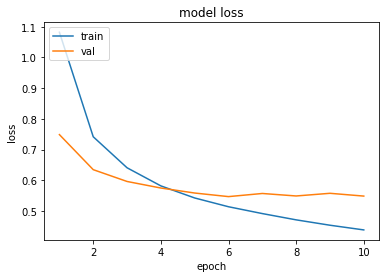

In [216]:
epochs = range(1, len(history.history['acc']) + 1)
plt.plot(epochs, history.history['loss'])
plt.plot(epochs, history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

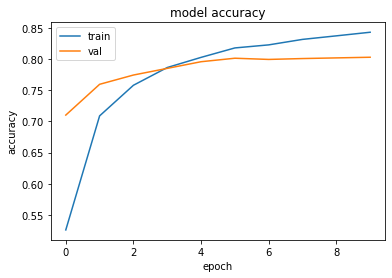

In [217]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')

In [162]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_4 (Embedding)     (None, None, 100)         1031100   
                                                                 
 lstm_2 (LSTM)               (None, 128)               117248    
                                                                 
 dense_4 (Dense)             (None, 4)                 516       
                                                                 
Total params: 1,148,864
Trainable params: 1,148,864
Non-trainable params: 0
_________________________________________________________________


In [218]:
loaded_model = load_model('best_model.h5')

In [220]:
print("\n 테스트 정확도: %.4f" % (model.evaluate(X_test_padded, y_test_en_en)[1]))

224/224 [==============================] - 1s 5ms/step - loss: 0.5856 - acc: 0.7937

 테스트 정확도: 0.7937
